# 2040 le cap des 100% de voitures électriques 
*Etude data - Projet 8 - @Nalron (août 2020)*\
*Traitement des données sur Jupyter Notebook (Distribution Anaconda)*\
*Etude réalisée en langage Python*

Visualisation des Tableaux de bord: [Tableau Public](https://public.tableau.com/profile/nalron#!/vizhome/ElectricCarsFrance2040/Vuedensemble)

---

# Rappel des missions


### [Mission 1 : Positionnement de la voiture électrique en France](https://github.com/nalron/project_electric_cars_france2040/blob/french_version/p8_notebook01.ipynb)
Évolution du parc automobile électrique à 2 ans.<br>
Identification et classification des inégalités locales des voitures électriques.<br>
Autonomie et consommation moyenne d'une voiture électrique.

### [Mission 2 : Besoin des déploiements en IRVE](https://github.com/nalron/project_electric_cars_france2040/blob/french_version/p8_notebook02.ipynb)
Évolution du nombre de points de recharge disponibles ouverts au public.<br>
Analyse de la répartition par borne de recharge, type de prise et catégorie d’aménageur.<br>
Utilisation des ratios pour le dimensionnement d'un maillage de taille optimale.<br>
Prévision du nombre de PDC à horizon 2025.<br>

### [Mission 3 : Appel de charge au réseau électrique](https://github.com/nalron/project_electric_cars_france2040/blob/french_version/p8_notebook03.ipynb)
Analyse de la consommation d'électricité en France et des filières de production.<br>
Profiler un pic d’utilisation des bornes de recharge.<br>
Courbe de charge réseau électrique pour répondre aux nouveaux modes de consommation.

---

In [3]:
#Import des principales librairies Python
import pandas as pd
import plotly.figure_factory as ff
import requests
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Mission 2 : Besoin des déploiements en IRVE<a id="borne">

__`Traitement des données sur les points de charge par typologie`__

Ce jeu de données présente le nombre total de points de charge en France continentale.

Les points de charge sont matérialisés par un socle de prise sur lequel un véhicule électrique peut potentiellement se brancher. Une borne de recharge peut comporter un ou plusieurs points de charge. Les données présentées segmentent les points de charge en trois typologies :

- Les points de charge « accessible au public » correspondent aux points de charge accessibles dans les commerces (supermarché, concession automobile…), parking, sites publics ou stations en voirie.
- Les points de charge « particulier » sont des points de charges privés localisés dans le résidentiel collectif (immeubles, copropriétés…) ou individuel (pavillons).
- Les points de charge « société » sont des points de charge privés localisés dans les sociétés et réservés à l’activité de la société ou à la recharge des véhicules électriques des employés.

Le jeu de données a été élaboré par Enedis à partir de ses données propres combinées avec certaines données externes, issues des sociétés Girève et AAA Data. Les données sur les points de charge « particulier » et « société » sont une reconstitution de l’existant construite par Enedis sur la base d’hypothèses. Ces hypothèses s’appuient sur l’évolution du marché du véhicule électrique.

In [101]:
#Chargement du jeu de données "nombre-de-points-de-charge-par-typologie.csv"
irve_type = pd.read_csv('p8_data/nombre-de-points-de-charge-par-typologie.csv', sep=';')
display(irve_type.shape)
display(irve_type.head())

(60, 5)

,Année,Trimestre,Année et trimestre,Typologie,Nombre
0,2019,T3,2019 T3,Accessible au public,31461
1,2016,T2,2016 T2,Accessible au public,13861
2,2019,T4,2019 T4,Particulier,116361
3,2016,T1,2016 T1,Particulier,31629
4,2017,T1,2017 T1,Société,66596


In [102]:
#Analyse des valeurs de la variable 'Nombre'
irve_type['Nombre'].unique()

array([ 31461,  13861, 116361,  31629,  66596,  30110,  26297,  26370,
        10086,  84162,  76006,  53212,  36161,  26728,  22234, 134471,
        22283,  17423, 106204,  98314,  57079,  84206,  36851,  19750,
        16220,   8478, 141159,  24362,  12859,  15777,  91277,  61288,
        42541,  33196,  27446,  20688,  68403,  39109, 114322,  56530,
        48306,  37903,  28910,  91560,  72879,  19314, 154640, 142625,
       104318,  78064,  52902,  19309,  12830,  11113,  10928,  62649,
        48707,  43354,  98067,  72582])

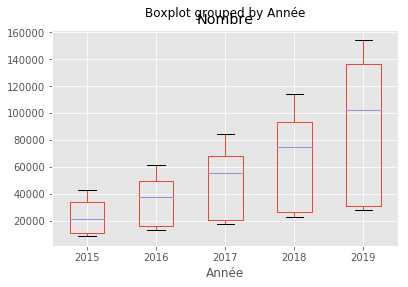

In [103]:
#plt.figure(figsize=(12,3))
irve_type.boxplot(column= 'Nombre', by='Année')
plt.show()

Il ne semble pas avoir de valeur aberrante dans les valeurs de la variable 'Nombre'. Pour rappel, ici nous avons les points de charge électriques quantifiés par année et trimestre.

In [104]:
#Mise en forme plus logique des données selon l'année et le trimestre
irve_type = irve_type.pivot_table(index=['Année', 'Trimestre'], 
                                  columns='Typologie', 
                                  values='Nombre').reset_index()
irve_type.columns.name = None
irve_type

,Année,Trimestre,Accessible au public,Particulier,Société
0,2015,T1,8478,15777,33196
1,2015,T2,10086,19314,36851
2,2015,T3,10928,22234,37903
3,2015,T4,11113,26728,42541
4,2016,T1,12830,31629,48306
5,2016,T2,13861,36161,52902
6,2016,T3,12859,39109,56530
7,2016,T4,16220,43354,61288
8,2017,T1,17423,48707,66596
9,2017,T2,19750,53212,72582


In [105]:
#Calcul des évolutions en % entre chaque trimestre
for i, row in irve_type.iterrows():
    if i+1 < len(irve_type):
        number_public = ((irve_type.loc[i+1, 'Accessible au public'] 
                   - irve_type.loc[i, 'Accessible au public']) / (irve_type.loc[i, 'Accessible au public'])*100)
        irve_type.loc[i+1, '%Public'] = round(number_public, 2)
    if i+1 < len(irve_type):
        number_particulier = ((irve_type.loc[i+1, 'Particulier'] 
                   - irve_type.loc[i, 'Particulier']) / (irve_type.loc[i, 'Particulier'])*100)
        irve_type.loc[i+1, '%Particulier'] = round(number_particulier, 2)
    if i+1 < len(irve_type):
        number_societe = ((irve_type.loc[i+1, 'Société'] 
                   - irve_type.loc[i, 'Société']) / (irve_type.loc[i, 'Société'])*100)
        irve_type.loc[i+1, '%Société'] = round(number_societe, 2)
    else :
        irve_type.fillna(0, inplace=True)
        pass


In [106]:
#Modification des Trimestres pour obtenir un Time Series
irve_type.replace({'T1' : '31-03',
                    'T2' : '30-06',
                    'T3' : '30-09',
                    'T4' : '31-12'},
                   inplace=True)

irve_type['Time'] = irve_type['Année'].astype(str)+ str("-")+irve_type['Trimestre']
irve_type['Time'] = pd.to_datetime(irve_type['Time'], format="%Y-%d-%m")

In [107]:
#Affichage du dataframe enrichi
irve_type

,Année,Trimestre,Accessible au public,Particulier,Société,%Public,%Particulier,%Société,Time
0,2015,31-03,8478,15777,33196,0.00,0.00,0.00,2015-03-31
1,2015,30-06,10086,19314,36851,18.97,22.42,11.01,2015-06-30
2,2015,30-09,10928,22234,37903,8.35,15.12,2.85,2015-09-30
3,2015,31-12,11113,26728,42541,1.69,20.21,12.24,2015-12-31
4,2016,31-03,12830,31629,48306,15.45,18.34,13.55,2016-03-31
5,2016,30-06,13861,36161,52902,8.04,14.33,9.51,2016-06-30
6,2016,30-09,12859,39109,56530,-7.23,8.15,6.86,2016-09-30
7,2016,31-12,16220,43354,61288,26.14,10.85,8.42,2016-12-31
8,2017,31-03,17423,48707,66596,7.42,12.35,8.66,2017-03-31
9,2017,30-06,19750,53212,72582,13.36,9.25,8.99,2017-06-30


In [108]:
#Affichage des types de données /Variables
irve_type.dtypes

Année                            int64
Trimestre                       object
Accessible au public             int64
Particulier                      int64
Société                          int64
%Public                        float64
%Particulier                   float64
%Société                       float64
Time                    datetime64[ns]
dtype: object

In [109]:
#Sauvegarde 
irve_type.to_csv('p8_datatable/irve_type.csv')

In [110]:
#Analyse des valeurs manquantes du jeu de données 
irve_type.isna().any()

Année                   False
Trimestre               False
Accessible au public    False
Particulier             False
Société                 False
%Public                 False
%Particulier            False
%Société                False
Time                    False
dtype: bool

In [111]:
#Analyse des valeurs doublons du jeu de données 
irve_type.duplicated().any()

False

In [112]:
#Années traitées dans ce jeu de données list
list(irve_type['Année'].unique())

[2015, 2016, 2017, 2018, 2019]

__`Traitement des données sur les bornes de recharge pour vehicules electriques (IRVE)`__

Ce fichier est une version consolidée des sources suivantes: Stations Tesla, Bornes de la Métropole de Rennes, Bornes dans les Concessions Renault, Bornes Autolib', Plus de Bornes, opérateur en Provence, Compagnie Nationale du Rhône, Magasins E.Leclerc

Données ajoutées en décembre 2014: Vincipark/Sodetrel, Grand Lyon, Morbihan Energies

Données ajoutées en octobre 2015: Magasins AUCHAN, Concessions NISSAN, Réseau ALTERBASE, SyDEV, Freshmile, EFFIA

Données ajoutées en mai 2016: SDE18, SDE24, SDE28, SDE32, MOVeasy, Seine Aval, SIEML, SDESM, Vienne

In [113]:
#Chargement du jeu de données "fichier-consolide-des-bornes-de-recharge-pour-vehicules-electriques-irve"
irve = pd.read_csv('p8_data/fichier-consolide-des-bornes-de-recharge-pour-vehicules-electriques-irve.csv', 
                   sep=';')
display(irve.shape)
display(irve.head())

(12199, 18)

,n_amenageur,n_operateur,n_enseigne,id_station,n_station,ad_station,code_insee,Xlongitude,Ylatitude,nbre_pdc,id_pdc,puiss_max,type_prise,acces_recharge,accessibilité,observations,date_maj,source
0,Aix-Marseille-Provence,BOUYGUES ENERGIES ET SERVICES,MAMP,FR*M13*P13214*001,MARSEILLE-14E - Rue De La Busserine,Rue De La Busserine 13014 MARSEILLE-14E,13214.0,5.393556,43.330417,0.0,FR*M13*E13214*001*2,22,EF - T2,payant,24h/24 7j/7,Recharge par badge et avec une application sma...,2020/05/20,https://www.data.gouv.fr/fr/datasets/infrastru...
1,Aix-Marseille-Provence,BOUYGUES ENERGIES ET SERVICES,MAMP,FR*M13*P13001*015,AIX-EN-PROVENCE - Route De Sisteron,Route De Sisteron 13100 AIX-EN-PROVENCE,13001.0,5.459641,43.556239,0.0,FR*M13*E13001*015*2,22,EF - T2,payant,24h/24 7j/7,Recharge par badge et avec une application sma...,2020/05/20,https://www.data.gouv.fr/fr/datasets/infrastru...
2,Aix-Marseille-Provence,BOUYGUES ENERGIES ET SERVICES,MAMP,FR*M13*P13055*004,MARSEILLE - Campus Luminy,Campus Luminy 13000 MARSEILLE,13055.0,5.438303,43.231932,2.0,FR*M13*E13055*004*3,4,EF,payant,24h/24 7j/7,Recharge par badge et avec une application sma...,2020/05/20,https://www.data.gouv.fr/fr/datasets/infrastru...
3,Aix-Marseille-Provence,BOUYGUES ENERGIES ET SERVICES,MAMP,FR*M13*P13209*001,MARSEILLE-9E - Rue Antoine Fortuné Marion - Pa...,Rue Antoine Fortuné Marion - Parking Jarre 130...,13209.0,5.404021,43.238356,2.0,FR*M13*E13209*001*1,22,EF - T2,payant,24h/24 7j/7,Recharge par badge et avec une application sma...,2020/05/20,https://www.data.gouv.fr/fr/datasets/infrastru...
4,Aix-Marseille-Provence,BOUYGUES ENERGIES ET SERVICES,MAMP,FR*M13*P13055*004,MARSEILLE - Campus Luminy,Campus Luminy 13000 MARSEILLE,13055.0,5.438303,43.231932,2.0,FR*M13*E13055*004*2,4,EF,payant,24h/24 7j/7,Recharge par badge et avec une application sma...,2020/05/20,https://www.data.gouv.fr/fr/datasets/infrastru...


Le premier point de contrôle passe par la recherche d'éventuels doublons. Notons que le contexte métier nécessite de la rigueur dans l'interprétation de certaines variables, l'amalgame entre station, borne et point de charge est régulièrement rencontré. Donc, "id_station" n'est pas le sous-ensemble le plus approprié à l'identification de doublons, une station de recharge peut avoir plusieurs points de charge, et l'identifiant ne tient pas compte du point de charge. Notons que "id_pdc" permet d'obtenir des identifiants uniques pouvant cette fois-ci être pris comme sous-ensemble.

In [114]:
#Test de recherche des éventuels doublons à partir de la variable 'id_pdc'
irve.duplicated(subset='id_pdc').sum()

0

Notons que le fichier mis à disposition sur le site data.gouv.fr annonce plusieurs consolidations selon les années 2014 à 2016 et 2018. Attention, quelques opérateurs comme Tesla, Nissan, Auchan, etc… ne sont plus observés dans la version de juin 2020 et même depuis plusieurs mois. Non pas parce que ces stations de recharge ont été retirées, mais par logique d'uniformisation selon une charte d'utilisation "Fichiers à destination des aménageurs et opérateurs publics et privés d'infrastructures de recharge pour véhicules électriques" consultable sur [data.gouv.fr](https://www.data.gouv.fr/fr/datasets/fichiers-pour-les-infrastructures-de-recharge-de-vehicules-electriques/)

<em>Le décret 2017-26 du 12 janvier 2017 fixe les exigences requises pour la configuration des points de recharge à publier sur un nouveau fichier désormais en CSV. L'aménageur, ou l'opérateur désigné le cas échéant, prend les mesures appropriées pour que ces données soient en permanence tenues à jour et rendues publiques sur data.gouv.fr</em>

<u>Dans le cadre de l'étude, les opérateurs (ou principaux opérateurs) identifiés comme manquants seront réintégrés dans l'échantillon.</u>

In [115]:
#Combien de stations de recharge (en anglais Charging Station Pool) à Juin 2020?
irve.id_station.nunique()

5610

In [116]:
#Combien de bornes de recharge (en anglais Charging Station) à Juin 2020?
irve.id_pdc.nunique()

12199

**Combien de points de charge (en anglais Charging Point ou EVSE) à Juin 2020?**
Selon la définition de l'AFIREV, le point de charge représente le nombre d'emplacement individuel permettant le stationnement du véhicule pendant le temps de charge, donc le nombre de prises de la borne. Le jeu de données `irve` ne permet pas de le quantifier directement, malgré la présence d'une variable 'nbre_pdc' qui ne représente que la borne et non le nombre de prises. Notons qu'il est nécessaire d'enrichir les données par une estimation des prises de chacune des bornes, ce calcul pourra être réalisé à l'aide de la variable 'type_prise'. <u>Cet enrichissement sera fait plus tard après intégration des opérateurs manquants.</u>

### Exploitation des opérateurs et aménageurs manquants

In [117]:
#Chargement du jeu de données de l'enseigne "Mobive"
#https://www.data.gouv.fr/fr/datasets/infrastructures-de-recharge-pour-vehicules-electriques-mobive-1/
mobive = pd.read_csv('p8_data/irve-mobive-20200331.csv', sep=';', decimal=",")
display(mobive.shape)
display(mobive.head())

(1554, 17)

,n_amenageur,n_operateur,n_enseigne,id_station,n_station,ad_station,code_insee,Xlongitude,Ylatitude,nbre_pdc,id_pdc,puiss_max,type_prise,acces_recharge,accessibilite,observations,date_maj
0,SDE 24,BOUYGUES ENERGIES ET SERVICES,MObiVE,FR*S24*P24322*004,PERIGUEUX - Parking De La Gare,Parking De La Gare 24000 PERIGUEUX,24322,0.708173,45.187737,2,FR*S24*E24322*004*2,18,T2 - EF,payant,24h/24 7j/7,Recharge par badge et avec une application sma...,31/03/2020
1,SDE 24,BOUYGUES ENERGIES ET SERVICES,MObiVE,FR*S24*P24322*004,PERIGUEUX - Parking De La Gare,Parking De La Gare 24000 PERIGUEUX,24322,0.708173,45.187737,2,FR*S24*E24322*004*1,18,T2 - EF,payant,24h/24 7j/7,Recharge par badge et avec une application sma...,31/03/2020
2,SDE 24,BOUYGUES ENERGIES ET SERVICES,MObiVE,FR*S24*P24290*003,MONTIGNAC - D706 - Zone Commerciale Lacoste,D706 - Zone Commerciale Lacoste 24291 MONTIGNAC,24290,1.151401,45.055424,2,FR*S24*E24290*003*2,18,T2 - EF,payant,24h/24 7j/7,Recharge par badge et avec une application sma...,31/03/2020
3,SDE 24,BOUYGUES ENERGIES ET SERVICES,MObiVE,FR*S24*P24290*003,MONTIGNAC - D706 - Zone Commerciale Lacoste,D706 - Zone Commerciale Lacoste 24291 MONTIGNAC,24290,1.151401,45.055424,2,FR*S24*E24290*003*1,18,T2 - EF,payant,24h/24 7j/7,Recharge par badge et avec une application sma...,31/03/2020
4,SDE 24,BOUYGUES ENERGIES ET SERVICES,MObiVE,FR*S24*P24416*001,SAINT GENIES - Place De La Gare,Place De La Gare 24590 SAINT GENIES,24416,1.253506,44.993978,2,FR*S24*E24416*001*2,18,T2 - EF,payant,24h/24 7j/7,Recharge par badge et avec une application sma...,31/03/2020


In [118]:
#Test de matching des variables avant concaténation
display(irve.columns)
display(mobive.columns)

Index(['n_amenageur', 'n_operateur', 'n_enseigne', 'id_station', 'n_station',
       'ad_station', 'code_insee', 'Xlongitude', 'Ylatitude', 'nbre_pdc',
       'id_pdc', 'puiss_max', 'type_prise', 'acces_recharge', 'accessibilité',
       'observations', 'date_maj', 'source'],
      dtype='object')

Index(['n_amenageur', 'n_operateur', 'n_enseigne', 'id_station', 'n_station',
       'ad_station', 'code_insee', 'Xlongitude', 'Ylatitude', 'nbre_pdc',
       'id_pdc', 'puiss_max', 'type_prise', 'acces_recharge', 'accessibilite',
       'observations', 'date_maj'],
      dtype='object')

In [119]:
#Chargement du jeu de données de la grande distribution LECLERC
#https://www.data.gouv.fr/fr/datasets/localisation-des-bornes-de-recharge-
#pour-vehicules-electriques-dans-les-magasins-e-leclerc/
leclerc = pd.read_csv('p8_data/leclerc.csv', sep=';', decimal=",")
display(leclerc.shape)
display(leclerc.head())

(68, 11)

,ID_station,nom_station,adresse_station,latitude_WSG84,longitude_WSG84,nom_porteur,type_charge,nbre_pdc,type_connecteur,date_maj,observations
0,3100007,E.LECLERC Montluçon,345 AVENUE PRESIDENT AURIOL,46.3201,2.58099,SIPLEC,Accélérée,4,T3 et EF,01/10/2014,NaN
1,9100004,E.LECLERC Saint-Jean-du-Falga,Avenue des Pyrénées,43.0840,1.62995,SIPLEC,Accélérée,2,T3 et EF,01/10/2014,NaN
2,15004002,E.LECLERC Aurillac,Rue de la Jordanne,44.9171,2.44069,SIPLEC,Accélérée,2,T3 et EF,01/10/2014,NaN
3,16100004,E.LECLERC Cognac,105 Rue Basse Saint-Martin,45.6864,-0.33798,SIPLEC,Accélérée,2,T3 et EF,01/10/2014,NaN
4,17100006,E.LECLERC Saintes Abbaye,Cours Charles de Gaulle,45.7467,-0.67526,SIPLEC,Accélérée,2,T3 et EF,01/10/2014,NaN


In [120]:
#Test de matching des variables avant concaténation
display(irve.columns)
display(leclerc.columns)

Index(['n_amenageur', 'n_operateur', 'n_enseigne', 'id_station', 'n_station',
       'ad_station', 'code_insee', 'Xlongitude', 'Ylatitude', 'nbre_pdc',
       'id_pdc', 'puiss_max', 'type_prise', 'acces_recharge', 'accessibilité',
       'observations', 'date_maj', 'source'],
      dtype='object')

Index(['ID_station', 'nom_station', 'adresse_station', 'latitude_WSG84',
       'longitude_WSG84', 'nom_porteur', 'type_charge', 'nbre_pdc',
       'type_connecteur', 'date_maj', 'observations'],
      dtype='object')

In [121]:
#Divergences à traiter avant concaténation des données
leclerc.rename(columns={
    'nom_station': 'n_amenageur',
    'nom_porteur': 'n_enseigne',
    'ID_station': 'id_station',
    'adresse_station': 'ad_station',
    'longitude_WSG84': 'Xlongitude',
    'latitude_WSG84': 'Ylatitude',
    'type_connecteur': 'type_prise',
    'type_charge': 'puiss_max'
    }, inplace=True)

In [122]:
#Remplacement des modalités de la variable 'puiss_max'
leclerc['puiss_max'] = 22

In [123]:
#Chargement du jeu de données des bornes de la grande distribution AUCHAN
#https://www.data.gouv.fr/fr/datasets/reseau-bornes-de-recharge-rapide-auchan/
auchan = pd.read_csv('p8_data/auchan.csv', sep=';')
display(auchan.shape)
display(auchan.head())

(67, 11)

,N°,LIEU,ADRESSE,CP,Dept,Unnamed: 5,Latitude,Longitude,LIEN CHARGEMAP,Unnamed: 9,Unnamed: 10
0,1,AUCHAN,Chemin départemental 110,78200,78,BUCHELAY,48.983085,1.678852,http://fr.chargemap.com/points/details/auchan-...,NaN,NaN
1,2,AUCHAN,1449 Avenue de la République,26000,26,GUILHERAND - GRANGES,44.936360,4.872980,http://fr.chargemap.com/points/details/auchan-...,NaN,NaN
2,3,AUCHAN,ZAC du mont Gaillard (Centre Commercial Grand ...,76620,76,LE HAVRE,49.525400,0.112158,http://fr.chargemap.com/points/details/auchan-...,NaN,NaN
3,4,AUCHAN,1 à 9 avenue du maréchal Foch - RN34,93330,93,NEUILLY/MARNE,48.856898,2.528373,http://fr.chargemap.com/points/details/auchan-...,NaN,NaN
4,5,AUCHAN,Auchan Côte d'Opale Rte Nationale 42,62200,62,ST MARTIN BOULOGNE,50.733350,1.670628,http://fr.chargemap.com/points/details/auchan-...,NaN,NaN


In [124]:
#Fusion des variables relatives à l'adresse de la station
auchan['ad_station'] = auchan['ADRESSE'] + str(' ') + auchan['CP'].astype(str) + str(' ') + auchan['Unnamed: 5']

In [125]:
#Renommage des variables à traiter avant concaténation des données
auchan.rename(columns={
    'LIEU': 'n_amenageur',
    'Latitude': 'Ylatitude',
    'Longitude': 'Xlongitude'
}, inplace=True)

auchan.drop(columns=['N°', 'ADRESSE', 'CP', 'LIEN CHARGEMAP', 'Dept',  
                     'Unnamed: 5', 'Unnamed: 9', 'Unnamed: 10'], inplace=True)

In [126]:
#Intégration d'une variable 'puiss_max' représentatif de la puissance maximale 
#disponible dans plus de 90% des centres commerciaux AUCHAN
auchan['puiss_max'] = 50

In [127]:
#Chargement du jeu de données des bornes des parkings EFFIA
#https://www.data.gouv.fr/fr/datasets/bornes-de-recharge-pour-vehicules-electriques-parking-effia/
effia = pd.read_csv('p8_data/effia.csv', sep=';')
display(effia.shape)
display(effia.head())

(55, 15)

,ID_station,nom_station,adresse_station,latitude_WSG84,longitude_WSG84,nom_porteur,type_charge,nbre_pdc,type_connecteur,date_maj,observations,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,identifiant de la station (ou zone de charge),parking X ou quartier Y ou centre commercial Z,adresse postale complete,44.822222,4.860100,nom du porteur du projet,normale ou accŽlŽrŽe ou rapide,2,E,24/09/2014,par exemple les conditions et horaires d'accŹs...,NaN,NaN,NaN,NaN
1,1,Parking EFFIA Bercy,48 boulevard de Bercy 75012 PARIS,48.838768,2.382680,EFFIA,Normale,3,E,17/03/2015,https://www.resaplace.com/fr/parking/paris-ber...,NaN,NaN,NaN,NaN
2,2,Parking EFFIA Gare de Lyon (Chalon Sud),Rue de Chalon 75012 PARIS,48.844553,2.376643,EFFIA,Normale,2,E,17/03/2015,https://www.resaplace.com/fr/parking/paris-gar...,NaN,NaN,NaN,NaN
3,3,Parking EFFIA Montparnasse Catalogne,36 rue du Commandant Mouchotte 75014 PARIS,48.838061,2.319333,EFFIA,Normale,3,E,17/03/2015,https://www.resaplace.com/fr/parking/paris-gar...,NaN,NaN,NaN,NaN
4,4,Parking EFFIA Montparnasse Pasteur,Place des 5 Martyrs du Lycée Buffon 75015 PARIS,48.838897,2.316774,EFFIA,Normale,3,E,17/03/2015,https://www.resaplace.com/fr/parking/paris-gar...,NaN,NaN,NaN,NaN


In [128]:
#Renommage des variables à traiter avant concaténation des données
effia.rename(columns={
    'nom_station': 'n_amenageur',
    'adresse_station': 'ad_station',
    'latitude_WSG84': 'Ylatitude',
    'longitude_WSG84': 'Xlongitude', 
    'type_connecteur': 'type_prise',
    'type_charge': 'puiss_max',
    'nom_porteur': 'n_enseigne'
}, inplace=True)

effia.drop(index=0, inplace=True)
effia.drop(columns=['ID_station', 'observations', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13','Unnamed: 14'], 
           inplace=True)

In [129]:
#Changement de modalité de la variable 'puiss_max'
effia['puiss_max'] = 3.7

In [130]:
#Chargement du jeu de données des bornes des parkings VINCI
vinci = pd.read_csv('p8_data/vincipark.csv', sep=';')
display(vinci.shape)
display(vinci.head())

(66, 12)

,ID_station,nom_station,adresse_station,latitude,longitude,nom_porteur,type_charge,nbre_pdc,type_connecteur,date_maj,observations,source
0,VinciPark- Lobau,VinciPark- Lobau,4 Rue de Lobau 75004 PARIS,48.8600,2.35000,Sodetrel,normale,1,TE-T3,2014-11-20T00:00:00Z,Point de charge accessible suivant les conditi...,Vincipark
1,VinciPark- Lobau,VinciPark- Lobau,4 Rue de Lobau 75004 PARIS,48.8600,2.35000,Sodetrel,normale,1,TE-T3,2014-11-20T00:00:00Z,Point de charge accessible suivant les conditi...,Vincipark
2,VinciPark- Les Arts,VinciPark- Les Arts,Rue de la préfecture 95000 CERGY,49.0364,2.07749,Sodetrel,normale,1,TE-T3,2014-11-20T00:00:00Z,Point de charge accessible suivant les conditi...,Vincipark
3,VinciPark- Les Arts,VinciPark- Les Arts,Rue de la préfecture 95000 CERGY,49.0364,2.07749,Sodetrel,normale,1,TE-T3,2014-11-20T00:00:00Z,Point de charge accessible suivant les conditi...,Vincipark
4,VinciPark- Les Arts,VinciPark- Les Arts,Rue de la préfecture 95000 CERGY,49.0364,2.07749,Sodetrel,normale,1,TE-T3,2014-11-20T00:00:00Z,Point de charge accessible suivant les conditi...,Vincipark


In [131]:
#Renommage des variables à traiter avant concaténation des données
vinci.rename(columns={
    'nom_station': 'n_station',
    'adresse_station': 'ad_station',
    'latitude': 'Ylatitude',
    'longitude': 'Xlongitude',
    'nom_porteur': 'n_enseigne',
    'type_connecteur': 'type_prise',
}, inplace=True)

vinci.drop(columns=['ID_station', 'type_charge'], inplace=True)

In [132]:
#Chargement du jeu de données des bornes TESLA connecteur Recharge à destination
#https://www.data.gouv.fr/fr/datasets/recharge-a-destination-tesla/
tesla = pd.read_csv('p8_data/irve-tesla-destination-charging-20181130.csv', sep=';')
display(tesla.shape)
display(tesla.head())

(1609, 17)

,n_amenageur,n_operateur,n_enseigne,ID_station,n_station,ad_station,code_insee,Xlongitude,Xlatitude,nbre_pdc,ID_pdc,puiss_max,type_prise,acces_recharge,accessibilité,observations,date_maj
0,A Cheda,A Cheda,TESLA Recharge à Destination,NaN,A Cheda,"Cavallo Morto, Bonifacio, 20169 France",2A041,9.170151,41.405677,4,NaN,7,T2,gratuit Tesla,selon plages horaires,Réservé à la clientèle de l’établissement - co...,20181130
1,A Cheda,A Cheda,TESLA Recharge à Destination,NaN,A Cheda,"Cavallo Morto, Bonifacio, 20169 France",2A041,9.170151,41.405677,4,NaN,7,T2,gratuit Tesla,selon plages horaires,Réservé à la clientèle de l’établissement - co...,20181130
2,A Cheda,A Cheda,TESLA Recharge à Destination,NaN,A Cheda,"Cavallo Morto, Bonifacio, 20169 France",2A041,9.170151,41.405677,4,NaN,7,T2,se renseigner auprès de l'établissement,selon plages horaires,Réservé à la clientèle de l’établissement,20181130
3,A Cheda,A Cheda,TESLA Recharge à Destination,NaN,A Cheda,"Cavallo Morto, Bonifacio, 20169 France",2A041,9.170151,41.405677,4,NaN,7,T2,se renseigner auprès de l'établissement,selon plages horaires,Réservé à la clientèle de l’établissement,20181130
4,A L'Ecole Buissonière,A L'Ecole Buissonière,TESLA Recharge à Destination,NaN,A L'Ecole Buissonière,"4 Rue de la Foulerie, Honfleur, 14600 France",14041,0.231656,49.419542,2,NaN,11,T2,gratuit Tesla,selon plages horaires,Réservé à la clientèle de l’établissement - co...,20181130


In [133]:
#Changement de modalité pour la variable 'type_prise'
tesla['type_prise'] = "Tesla Type 2"

In [134]:
#Remplacement de la modalité 'A Cheda' par 'Tesla'
tesla['n_amenageur'].replace('A Cheda', 'Tesla', inplace=True)

In [135]:
#Renommage des variables à traiter avant concaténation des données
tesla.rename(columns={'Xlatitude': 'Ylatitude'}, inplace=True)
tesla.drop(columns=['ID_station', 'ID_pdc'], inplace=True)

In [136]:
#Chargement du jeu de données des bornes TESLA Supercharger
#https://www.data.gouv.fr/fr/datasets/stations-supercharger-tesla/
tesla_supercharger = pd.read_csv('p8_data/irve-tesla-supercharger-20181130.csv', sep=';')
display(tesla_supercharger.shape)
display(tesla_supercharger.head())

(68, 17)

,n_amenageur,n_operateur,n_enseigne,id_station,n_station,ad_station,code_insee,Xlongitude,Ylatitude,nbre_pdc,id_pdc,puiss_max,type_prise,acces_recharge,accessibilite,observations,date_maj
0,Tesla,Tesla,Tesla Supercharger,NaN,Tesla Supercharger Auxerre (Appoigny),Mercure Auxerre Nord - Route nationale 6 - Lie...,89013,3.542802,47.851830,8,NaN,120,T2 (spécifique Tesla),Tesla,24/7,Compatible uniquement avec les véhicules Tesla...,20181130
1,Tesla,Tesla,Tesla Supercharger,NaN,Tesla Supercharger Macon,1 Boulevard du Général de Gaulle - 71000 Sancé,71556,4.850173,46.346553,20,NaN,120,T2 (spécifique Tesla),Tesla,24/7,Compatible uniquement avec les véhicules Tesla...,20181130
2,Tesla,Tesla,Tesla Supercharger,NaN,Tesla Supercharger Chalons en Champagne (Matou...,8 Route Nationale - 51510 Matougues,51483,4.245022,48.991919,4,NaN,120,T2 (spécifique Tesla),Tesla,24/7,Compatible uniquement avec les véhicules Tesla...,20181130
3,Tesla,Tesla,Tesla Supercharger,NaN,Tesla Supercharger Chambéry,1097 Avenue Des Landiers - 73000 Chambéry,73160,5.899842,45.592227,4,NaN,120,T2 (spécifique Tesla),Tesla,24/7,Compatible uniquement avec les véhicules Tesla...,20181130
4,Tesla,Tesla,Tesla Supercharger,NaN,Tesla Supercharger Narbonne,130 Rue de L’Hôtellerie - 11100 Narbonne,11262,2.986016,43.167686,8,NaN,120,T2 (spécifique Tesla),Tesla,24/7,Compatible uniquement avec les véhicules Tesla...,20181130


In [137]:
#Renommage d'une variable à traiter avant concaténation des données
tesla_supercharger.rename(columns={'accessibilite' : 'accessibilité'}, inplace=True)

In [138]:
#Changement de modalité pour la variable 'type_prise'
tesla_supercharger['type_prise'] = "Tesla Supercharger"

In [139]:
#Chargement du jeu de données des bornes des Concessionnaires NISSAN
#https://www.data.gouv.fr/fr/datasets/reseau-bornes-de-recharge-rapide-concessions-nissan/
nissan = pd.read_csv('p8_data/nissan.csv', sep=';')
display(nissan.shape)
display(nissan.head())

(59, 15)

,LIEU,Type,ADRESSE,CP,Dept,VILLE,Code concession,Directeur Concession Nissan,Unnamed: 8,Téléphone,Latitude,Longitude,LIEN CHARGEMAP,Unnamed: 13,Unnamed: 14
0,Concession NISSAN,DC Chademo - 44 kWh,"79, boulevard Gambetta",6000.0,6.0,NICE,609.0,BRENAC,Dominique,04-92-15-82-15,43.703299,7.256004,http://fr.chargemap.com/points/details/nissan-...,NaN,NaN
1,Concession NISSAN,DC Chademo - 44 kWh,"32, avenue F. Sardou",13016.0,13.0,MARSEILLE,1323.0,SANTONI,Michel,04-95-06-10-10,43.360022,5.339142,http://fr.chargemap.com/points/details/nissan-...,NaN,NaN
2,Concession NISSAN,DC Chademo - 44 kWh,"24, route de Galice",13090.0,13.0,AIX-EN-PROVENCE,1308.0,COURIANT,Alice,04-42-52-52-90,43.528462,5.431113,http://fr.chargemap.com/points/details/nissan-...,NaN,NaN
3,Concession NISSAN,DC Chademo - 44 kWh,ZA des Fourneaux,17690.0,17.0,ANGOULINS,1705.0,LIAIGRE,Aurélie,05-46-27-99-27,46.103866,-1.110261,http://fr.chargemap.com/points/details/nissan-...,NaN,NaN
4,Concession NISSAN,DC Chademo - 44 kWh,"13 Bis, Avenue Val de L'Eure",28630.0,28.0,FONTENAY SUR EURE,2803.0,MARAIS,Francis,02-37-34-48-78,48.420661,1.444959,http://fr.chargemap.com/points/details/nissan-lga,NaN,NaN


In [140]:
#Suppression d'une observation NaN
nissan.drop(index=58, inplace= True)

In [141]:
#Adaptation de la variable représentative des modalités de l'adresse
nissan['ad_station'] = nissan['ADRESSE'] + str(' ') + nissan['CP'].astype(str) + str(' ') + nissan['VILLE']

In [142]:
#Renommage des variables à traiter avant concaténation des données
nissan.rename(columns={
    'LIEU': 'n_enseigne',
    'Type': 'type_prise',
    'Latitude': 'Ylatitude',
    'Longitude': 'Xlongitude'
}, inplace=True)

nissan.drop(columns=['ADRESSE', 'CP', 'Dept', 'VILLE', 'Code concession', 'Unnamed: 8', 'Téléphone',  
                     'Directeur Concession Nissan', 'Unnamed: 13', 'Unnamed: 14', 'LIEN CHARGEMAP'], inplace=True)

In [143]:
#Chargement du jeu de données des bornes des Concessionnaires RENAULT
#https://www.data.gouv.fr/fr/datasets/reseau-bornes-de-recharge-rapide-concessions-nissan/
renault = pd.read_csv('p8_data/renault.csv', sep=';', decimal=",")
display(renault.shape)
display(renault.head())

(369, 11)

,ID_station,nom_station,adresse_station,longitude_WSG84,latitude_WSG84,nom_porteur,type_charge,nbre_pdc,type_connecteur,date_maj,observation
0,REN001,ETABLISSEMENT RENAULT DE BOURG-EN-BRESSE,NaN,46.212732,5.218786,Renault,accélérée,NaN,Type 3c,01/07/2014,Point de recharge accessible uniquement durant...
1,REN002,ETABLISSEMENT RENAULT DE CESSY,NaN,46.305656,6.066023,Renault,accélérée,NaN,Type 3c,01/07/2014,Point de recharge accessible uniquement durant...
2,REN003,ETABLISSEMENT RENAULT DE BELLEGARDE-SUR-VALSERINE,NaN,46.119135,5.810467,Renault,accélérée,NaN,Type 3c,01/07/2014,Point de recharge accessible uniquement durant...
3,REN004,ETABLISSEMENT RENAULT DE LAON,NaN,49.583957,3.647164,Renault,accélérée,NaN,Type 3c,01/07/2014,Point de recharge accessible uniquement durant...
4,REN005,ETABLISSEMENT RENAULT DE SAINT-QUENTIN,NaN,49.850773,3.262393,Renault,accélérée,NaN,Type 3c,01/07/2014,Point de recharge accessible uniquement durant...


In [144]:
#Renommage des variables à traiter avant concaténation des données
renault.rename(columns={
    'nom_station': 'n_station',
    'longitude_WSG84': 'Ylatitude',
    'latitude_WSG84': 'Xlongitude',
    'nom_porteur': 'n_enseigne',
    'type_connecteur': 'type_prise',
    'type_charge':'puiss_max',
    'observation': 'observations'
}, inplace=True)

renault.drop(columns=['ID_station', 'adresse_station', 'nbre_pdc'], inplace=True)

In [145]:
#Intégration d'une variable 'puiss_max'
renault['puiss_max'] = 22

In [146]:
#Concaténation des jeux de données
irvePlus = pd.concat([irve, mobive, leclerc, auchan, effia, vinci, tesla, tesla_supercharger, nissan, renault], 
                      sort=False).reset_index(drop=True)

In [147]:
#Affichage des 5 premières observations
irvePlus.head()

,n_amenageur,n_operateur,n_enseigne,id_station,n_station,ad_station,code_insee,Xlongitude,Ylatitude,nbre_pdc,id_pdc,puiss_max,type_prise,acces_recharge,accessibilité,observations,date_maj,source,accessibilite
0,Aix-Marseille-Provence,BOUYGUES ENERGIES ET SERVICES,MAMP,FR*M13*P13214*001,MARSEILLE-14E - Rue De La Busserine,Rue De La Busserine 13014 MARSEILLE-14E,13214,5.393556,43.330417,0.0,FR*M13*E13214*001*2,22,EF - T2,payant,24h/24 7j/7,Recharge par badge et avec une application sma...,2020/05/20,https://www.data.gouv.fr/fr/datasets/infrastru...,NaN
1,Aix-Marseille-Provence,BOUYGUES ENERGIES ET SERVICES,MAMP,FR*M13*P13001*015,AIX-EN-PROVENCE - Route De Sisteron,Route De Sisteron 13100 AIX-EN-PROVENCE,13001,5.459641,43.556239,0.0,FR*M13*E13001*015*2,22,EF - T2,payant,24h/24 7j/7,Recharge par badge et avec une application sma...,2020/05/20,https://www.data.gouv.fr/fr/datasets/infrastru...,NaN
2,Aix-Marseille-Provence,BOUYGUES ENERGIES ET SERVICES,MAMP,FR*M13*P13055*004,MARSEILLE - Campus Luminy,Campus Luminy 13000 MARSEILLE,13055,5.438303,43.231932,2.0,FR*M13*E13055*004*3,4,EF,payant,24h/24 7j/7,Recharge par badge et avec une application sma...,2020/05/20,https://www.data.gouv.fr/fr/datasets/infrastru...,NaN
3,Aix-Marseille-Provence,BOUYGUES ENERGIES ET SERVICES,MAMP,FR*M13*P13209*001,MARSEILLE-9E - Rue Antoine Fortuné Marion - Pa...,Rue Antoine Fortuné Marion - Parking Jarre 130...,13209,5.404021,43.238356,2.0,FR*M13*E13209*001*1,22,EF - T2,payant,24h/24 7j/7,Recharge par badge et avec une application sma...,2020/05/20,https://www.data.gouv.fr/fr/datasets/infrastru...,NaN
4,Aix-Marseille-Provence,BOUYGUES ENERGIES ET SERVICES,MAMP,FR*M13*P13055*004,MARSEILLE - Campus Luminy,Campus Luminy 13000 MARSEILLE,13055,5.438303,43.231932,2.0,FR*M13*E13055*004*2,4,EF,payant,24h/24 7j/7,Recharge par badge et avec une application sma...,2020/05/20,https://www.data.gouv.fr/fr/datasets/infrastru...,NaN


In [148]:
#Affichage du nombre d'observations
#Ici une observation représente une Borne de recharge
len(irvePlus)

16112

In [149]:
#Analyse des valeurs manquantes
irvePlus.isna().sum()

n_amenageur         493
n_operateur         682
n_enseigne          476
id_station         2737
n_station           249
ad_station          370
code_insee         1599
Xlongitude            2
Ylatitude             2
nbre_pdc           2410
id_pdc             2359
puiss_max           124
type_prise           67
acces_recharge      685
accessibilité      2796
observations       4027
date_maj            125
source             3847
accessibilite     14558
dtype: int64

Les précédentes manipulations font que des valeurs et modalités doivent être manquantes, visibles ci-dessus. Notons que dans le contexte de l'étude, il n'est pas nécessaire d'avoir 100% des données suivant les observations, voyons comment traiter ces NaN. 

#### Traitement NaN des variables n_amenageur, n_operateur et n_enseigne

In [150]:
#Traitement des NaN relatifs aux aménageurs selon l'enseigne
irvePlus[irvePlus['n_amenageur'].isna()]['n_enseigne'].unique()

array(['Sodetrel', 'Concession NISSAN', 'NISSAN WEST EUROPE TRAINING',
       'Siège NISSAN France', 'Renault'], dtype=object)

In [151]:
#Boucle permettant le remplacement des valeurs manquantes des aménageurs selon condition
for i, row in irvePlus.iterrows():
    if row['n_enseigne'] == 'SIPLEC':
        irvePlus.loc[i, 'n_amenageur'] = 'LECLERC'      
    elif row['n_enseigne'] == 'EFFIA':
        irvePlus.loc[i, 'n_amenageur'] = 'EFFIA' 
    elif row['n_enseigne'] == 'Sodetrel':
        irvePlus.loc[i, 'n_amenageur'] = 'IZIVIA'
    elif row['n_enseigne'] == 'Concession NISSAN' or row['n_enseigne'] == 'NISSAN WEST EUROPE TRAINING' or row['n_enseigne'] == 'Siège NISSAN France':
        irvePlus.loc[i, 'n_amenageur'] = 'NISSAN'
    elif row['n_enseigne'] == 'Renault':
        irvePlus.loc[i, 'n_amenageur'] = 'RENAULT'   
    else :
        pass

In [152]:
#Traitement des NaN relatifs aux opérateurs selon l'aménageur
irvePlus[irvePlus['n_operateur'].isna()]['n_amenageur'].unique()

array(['LECLERC', 'AUCHAN  ', 'EFFIA', 'IZIVIA', 'NISSAN', 'RENAULT'],
      dtype=object)

In [153]:
#Boucle permettant le remplacement des valeurs manquantes des aménageurs selon condition
for i, row in irvePlus.iterrows():
    if row['n_amenageur'] == 'LECLERC':
        irvePlus.loc[i, 'n_operateur'] = 'LECLERC'
    elif row['n_amenageur'] == 'AUCHAN  ':
        irvePlus.loc[i, 'n_operateur'] = 'AUCHAN'
    elif row['n_amenageur'] == 'EFFIA':
        irvePlus.loc[i, 'n_operateur'] = 'EFFIA'
    elif row['n_amenageur'] == 'IZIVIA':
        irvePlus.loc[i, 'n_operateur'] = 'IZIVIA' 
    elif row['n_amenageur'] == 'NISSAN':
        irvePlus.loc[i, 'n_operateur'] = 'NISSAN'
    elif row['n_amenageur'] == 'RENAULT':
        irvePlus.loc[i, 'n_operateur'] = 'RENAULT'  
    else :
        pass

In [154]:
#Traitement des NaN relatifs aux enseignes selon l'opérateur
irvePlus[irvePlus['n_enseigne'].isna()]['n_operateur'].unique()

array(['CITEOS/FRESHMILE', 'New motion', 'MOUVELECVAR', 'SAINT-LOUIS',
       'SPIE', 'AUCHAN'], dtype=object)

In [155]:
#Boucle permettant le remplacement des valeurs manquantes des enseignes selon condition
for i, row in irvePlus.iterrows():
    if row['n_operateur'] == 'CITEOS/FRESHMILE':
        irvePlus.loc[i, 'n_enseigne'] = 'Scame'
    elif row['n_operateur'] == 'New motion':
        irvePlus.loc[i, 'n_enseigne'] = 'New motion'
    elif row['n_operateur'] == 'MOUVELECVAR':
        irvePlus.loc[i, 'n_enseigne'] = 'MOUVELECVAR'
    elif row['n_operateur'] == 'SAINT-LOUIS':
        irvePlus.loc[i, 'n_enseigne'] = 'SAINT-LOUIS' 
    elif row['n_operateur'] == 'SPIE':
        irvePlus.loc[i, 'n_enseigne'] = 'SDEY'
    elif row['n_operateur'] == 'AUCHAN':
        irvePlus.loc[i, 'n_enseigne'] = 'AUCHAN'  
    else :
        pass

#### Traitement NaN des variables Xlongitude et Ylatitude

In [156]:
#Traitement des deux NaN 'Xlongitude' et 'Ylatitude'
irvePlus[irvePlus['Xlongitude'].isna()]

,n_amenageur,n_operateur,n_enseigne,id_station,n_station,ad_station,code_insee,Xlongitude,Ylatitude,nbre_pdc,id_pdc,puiss_max,type_prise,acces_recharge,accessibilité,observations,date_maj,source,accessibilite
2188,MABLY,SIEL42,MOBILOIRE,FRS42P42127B1,Bonvert,rue bathélémy thimonnier,42127,NaN,NaN,2.0,FRS42P42127B12,22,E/F-T2,Payant depuis le 01/07/2018,24/24 - 7/7,En service,2020/04/15,https://www.data.gouv.fr/fr/datasets/reseau-mo...,NaN
2189,MABLY,SIEL42,MOBILOIRE,FRS42P42127B1,Bonvert,rue bathélémy thimonnier,42127,NaN,NaN,2.0,FRS42P42127B11,22,E/F-T2,Payant depuis le 01/07/2018,24/24 - 7/7,En service,2020/04/15,https://www.data.gouv.fr/fr/datasets/reseau-mo...,NaN


In [157]:
#Intégration manuelle des 4 valeurs 
irvePlus['Xlongitude'][2188] = 4.0811882 
irvePlus['Xlongitude'][2189] = 4.0811882 
irvePlus['Ylatitude'][2188] = 46.0822754 
irvePlus['Ylatitude'][2189] = 46.0822754 

#### Traitement NaN de la variable 'type_prise'

In [158]:
#Traitement des valeurs NaN identifiées pour le type de prise
irvePlus[irvePlus['type_prise'].isna()]['n_operateur'].unique()

array(['AUCHAN'], dtype=object)

Globalement le groupe Auchan à équipé ses parkings de bornes Type 2 + CHAdeMO, notons que l'échantillon sera donc complété selon cette hypothèse, hypothèse retenue et préférable devant les NaN.

In [159]:
#Boucle permettant le remplacement des valeurs manquantes identifiées ci-dessus
for i, row in irvePlus.iterrows():
    if row['n_operateur'] == 'AUCHAN':
        irvePlus.loc[i, 'type_prise'] = 'Type 2 + CHAdeMO'

#### Traitement NaN de la variable 'puiss_max'

In [160]:
#Traitement des valeurs NaN identifiées pour la puissance max.
#Le type de prise permet de pouvoir intervenir sur ces valeurs manquantes
irvePlus[irvePlus['puiss_max'].isna()]['type_prise'].unique()

array(['TE-T3', 'TE-T2', 'DC Chademo - 44 kWh',
       'DC Chademo - 44 kWh + \nAC Type 3 - 43 kWh'], dtype=object)

In [161]:
#Boucle permettant le remplacement des valeurs manquantes des puissances max. identifiées ci-dessus
for i, row in irvePlus.iterrows():
    if row['type_prise'] == 'TE-T3':
        irvePlus.loc[i, 'puiss_max'] = 22
    elif row['type_prise'] == 'TE-T2': 
        irvePlus.loc[i, 'puiss_max'] = 22
    elif row['type_prise'] == 'DC Chademo - 44 kWh': 
        irvePlus.loc[i, 'puiss_max'] = 44
    elif row['type_prise'] == 'DC Chademo - 44 kWh + \nAC Type 3 - 43 kWh': 
        irvePlus.loc[i, 'puiss_max'] = 44
    else:
        pass

In [162]:
#Nouvelle situation après ce traitement NaN
irvePlus.isna().sum()

n_amenageur           0
n_operateur           0
n_enseigne            0
id_station         2737
n_station           249
ad_station          370
code_insee         1599
Xlongitude            0
Ylatitude             0
nbre_pdc           2410
id_pdc             2359
puiss_max             0
type_prise            0
acces_recharge      685
accessibilité      2796
observations       4027
date_maj            125
source             3847
accessibilite     14558
dtype: int64

L'enrichissement de l'échantillon de départ `irve` rend l'exploitation de la variable 'id_pdc' obsolète. En effet, la concaténation avec les autres sources de données permet un recensement plus complet du réseau, mais sans pouvoir obtenir une charte d'utilisation commune et complète. En l'occurrence les id des points de charge ne sont plus complets, notons donc qu'il est nécessaire d'intégrer un identifiant unique à cet usage.

In [163]:
#Intégration d'un identifiant unique par Point de charge
irvePlus['id_borne']= np.arange(1, len(irvePlus)+1)

Il n'est pas nécessaire de traiter toutes les valeurs NaN, dans le contexte de l'étude les précédents traitements semblent être suffisants. Voyons immédiatement comment enrichir et optimiser ce qui peut l'être, comme par exemple les puissances et les types de prise.

#### Traitement à des fins d'uniformisation des modalités / valeurs de la variable 'puiss_max'

In [164]:
#Affichage des modalités et valeurs de la variable 'puiss_max'
irvePlus.puiss_max.unique()

array(['22', '4', '0', '3.7', '50', '43', '36kva', '48kva', '18', '36',
       '11', '7', '350', '22.00', '18.000', '22kva', '7.00', '18.00',
       '43.0', '44.00', '20.00', '44.0', '43.00', '0.0', '7.0', '30.0',
       '50.00', '24', '45', '22.0', '100', '43-50', '50.000', '22.000',
       '7.000', '20.000', '3.700', '60.000', '2.300', '3.18', '3', 18, 50,
       43, 4, 22, 36, 3.7, 7, 11, 17, 14, 10, 9, 6, 8, 13, 120, 44],
      dtype=object)

Difficilement exploitable, on peut comprendre que chaque "acteur" à l'origine des fichiers ait pu nommer les puissances selon ses propres codes ou habitudes, mais il est nécessaire de pouvoir clarifier le tout. Notons que l'étude menée est porteuse d'un message plus perceptible quelque soit l'interlocuteur, voyons comment mettre en place un classement des puissances. 

In [165]:
#Boucle pour éliminer les modalités dont l'unité 'kva' est mentionnée
for x in irvePlus['puiss_max']:
    if x == '36kva':
        irvePlus['puiss_max'].replace(x, '36', inplace=True)
    elif x == '22kva':
        irvePlus['puiss_max'].replace(x, '22', inplace=True)
    elif x == '48kva':
        irvePlus['puiss_max'].replace(x, '48', inplace=True)
    elif x == '43-50':
        irvePlus['puiss_max'].replace(x, '50', inplace=True)
    else:
        pass

In [166]:
#Recherche des valeurs '0', '0.0' et 60.000
irvePlus[(irvePlus.puiss_max == '0') | (irvePlus.puiss_max == '0.0') | (irvePlus.puiss_max == '60.000')]

,n_amenageur,n_operateur,n_enseigne,id_station,n_station,ad_station,code_insee,Xlongitude,Ylatitude,nbre_pdc,id_pdc,puiss_max,type_prise,acces_recharge,accessibilité,observations,date_maj,source,accessibilite,id_borne
136,Aix-Marseille-Provence,BOUYGUES ENERGIES ET SERVICES,MAMP,FR*M13*P13041*002,GARDANNE - Avenue D'Arménie (Semag),Avenue D'Arménie (Semag) 13120 GARDANNE,13041,5.44866,43.450954,0.0,FR*M13*E13041*002*2,0,EF - T2,payant,24h/24 7j/7,Recharge par badge et avec une application sma...,2020/05/20,https://www.data.gouv.fr/fr/datasets/infrastru...,NaN,137
3613,SDE 56,Morbihan énergies,Morbihan énergies,FR*S56*P56008*B,Route de Port Blanc,Route de Port Blanc 56870 Baden,56008,-2.862988,47.601551,3.0,FR*S56*E56008*B*B1*D,0.0,T2,gratuit,08h/17h-5J/7J,Recharge Gratuite,1970/01/01,https://www.data.gouv.fr/fr/datasets/bornes-de...,NaN,3614
3672,SDE 56,Morbihan énergies,Morbihan énergies,FR*S56*P56107*C,Place Kerpape,Place Kerpape 56260 Larmor-Plage,56107,-3.385609,47.70628,2.0,FR*S56*E56107*C*B1*D,0.0,T2,payant,24h/24h-7J/7J,"Tarif abonné Morbihan Energies: 18€ ttc/an, pu...",1970/01/01,https://www.data.gouv.fr/fr/datasets/bornes-de...,NaN,3673
3773,SDE 56,Morbihan énergies,Morbihan énergies,FR*S56*P56107*C,Place Kerpape,Place Kerpape 56260 Larmor-Plage,56107,-3.385609,47.70628,2.0,FR*S56*E56107*C*B1*G,0.0,T2,payant,24h/24h-7J/7J,"Tarif abonné Morbihan Energies: 18€ ttc/an, pu...",1970/01/01,https://www.data.gouv.fr/fr/datasets/bornes-de...,NaN,3774
3805,SDE 56,Morbihan énergies,Morbihan énergies,FR*S56*P56008*B,Route de Port Blanc,Route de Port Blanc 56870 Baden,56008,-2.862988,47.601551,3.0,FR*S56*E56008*B*B1*G,0.0,T2,gratuit,08h/17h-5J/7J,Recharge Gratuite,1970/01/01,https://www.data.gouv.fr/fr/datasets/bornes-de...,NaN,3806
11003,Syndicat de l'Énergie de l'Orne (TE61),Syndicat de l'Énergie de l'Orne (TE61) | FR*S61,Te61,FR*S61*P61491B,Tourouvre au Perche | Rue Charles de Gaulle,Rue Charles de Gaulle 61190 Tourouvre au Perche,NaN,0.646968,48.586845,4.0,FR*S61*E61491B12,60.000,22,Payant,24/24 7/7,NaN,2020/03/09,https://www.data.gouv.fr/fr/datasets/bornes-de...,NaN,11004
11010,Syndicat de l'Énergie de l'Orne (TE61),Syndicat de l'Énergie de l'Orne (TE61) | FR*S61,Te61,FR*S61*P61497A,Valframbert | Rue de Gatel 8,8 Rue de Gatel 61250 Valframbert,NaN,0.098126,48.449690,4.0,FR*S61*E61497A13,60.000,23,Payant,24/24 7/7,NaN,2020/03/09,https://www.data.gouv.fr/fr/datasets/bornes-de...,NaN,11011
11137,Syndicat de l'Énergie de l'Orne (TE61),Syndicat de l'Énergie de l'Orne (TE61) | FR*S61,Te61,FR*S61*P61145B,Domfront en Poiraie | Rue du Mont Saint-Michel,Rue du Mont Saint-Michel 61700 Domfront en Poi...,NaN,-0.661132,48.589447,4.0,FR*S61*E61145B12,60.000,22,Payant,24/24 7/7,NaN,2020/03/09,https://www.data.gouv.fr/fr/datasets/bornes-de...,NaN,11138
11160,Syndicat de l'Énergie de l'Orne (TE61),Syndicat de l'Énergie de l'Orne (TE61) | FR*S61,Te61,FR*S61*P61497A,Valframbert | Rue de Gatel 8,8 Rue de Gatel 61250 Valframbert,NaN,0.098126,48.449690,4.0,FR*S61*E61497A12,60.000,22,Payant,24/24 7/7,NaN,2020/03/09,https://www.data.gouv.fr/fr/datasets/bornes-de...,NaN,11161
11162,Syndicat de l'Énergie de l'Orne (TE61),Syndicat de l'Énergie de l'Orne (TE61) | FR*S61,Te61,FR*S61*P61006D,Argentan | Rue de la Picardie,Rue de la Picardie 61200 Argentan,NaN,-0.029512,48.750603,4.0,FR*S61*E61006D13,60.000,23,Payant,24/24 7/7,NaN,2020/03/09,https://www.data.gouv.fr/fr/datasets/bornes-de...,NaN,11163


In [167]:
#Remplacement des valeurs '0', '0.0' et '60.000'
irvePlus['puiss_max'].replace('0', 22, inplace=True)
irvePlus['puiss_max'].replace('0.0', 22, inplace=True) 
irvePlus['puiss_max'].replace('60.000', 22, inplace=True)

In [168]:
#Changement du type de donnée variable 'puiss_max' afin de faciliter son traitement
irvePlus['puiss_max'] = irvePlus.puiss_max.astype(float)

In [169]:
#Classification des puissances via une boucle sous condition
class_puiss = []
for value in irvePlus.puiss_max:
    if value <= 3.7 :
        class_puiss.append('Recharge normale 3,7 kVA')
    elif value > 3.7 and value <=20 :
        class_puiss.append('Recharge accélérée de 3,7 à 20 kVA')
    elif value == 22 :
        class_puiss.append('Recharge accélérée 22 kVA')
    elif value >= 43 and value <= 50 :
        class_puiss.append('Recharge rapide 43 à 50 kVA')
    else :
        class_puiss.append('Recharge haute puissance 100 à 350 kVA')

#Intégration d'une nouvelle variable 'class_puiss'
irvePlus['class_puiss'] = class_puiss

#### Traitement à des fins d'uniformisation des modalités  de la variable 'type_prise'

In [170]:
irvePlus.type_prise.unique()

array(['EF - T2', 'EF', 'EF - T3', 'T3 - EF', 'T2 - E/F', 'T2', 'COMBO',
       'CHADEMO', 'E/F-T2', 'T2 - EF', 'T2/EF', 'semi-rapide',
       'T2-Combo2-CHAdeMO', 'T2-CHAdeMO', 'CAHDEMO', 'T2-EF',
       'T2-AC Triphasé', 'T3', 'CHAdeMO', 'Combo 2', 'EF - T2 - T3',
       'CHADEMO - COMBO', 'T2/TE', 'EF - T2 - t3',
       'CCS350-CCS350-CCS350-CCS350-CCS50-CHAdeMO - T2',
       'CCS350-CCS350-CCS350-CCS350-CCS350-CCS350',
       'CCS350-CCS350-CCS350-CCS350', 'CCS350-CCS350-CCS50-CHAdeMO - T2',
       'E/F + T2', 'E/F-T5', 'E/F-T7', 'E/F + T3', 'E/F + T4', 'EF -  T2',
       'E/F', 'EF/T3', 'EF/T2', 'T2 Combo Chademo', 'T2-E/F',
       'CHAdeMO-Combo', 'T2S-E/F', 'combo', 'T3-E/F', 'CHAdeMO-EU',
       'E/F-T3', 'E/F - T2', 'A/C - Combo - CHAdeMO', 'T2 – E/F',
       'Borne SESAME de chez Sobem / Recharge de Type C , recharge acc?l?r?e, 2 prises sur chaque PDC : E/F et T2',
       'AC plug', 'Combo2-CHAdeMO', 'COMBO 2', 'combo2', 'AC socket',
       'Chademo', 'chademo', 'Combo2', 'Co

Le constat reste le même que pour les puissances, les modalités listées ci-dessus sont difficilement exploitables en l'état. Notons qu'il est nécessaire de pouvoir classifier correctement et de manière lisible les connecteurs des bornes.

In [171]:
#Création de listes groupant les diverses typologies rencontrées dans l'échantillon 
list_ef_x1 = ['EF', 'E/F', 'E', 'AC socket']

list_tesla_supercharger_x1 = ['Tesla Supercharger']

list_chademo_x1 = ['CHADEMO', 'CAHDEMO', 'CHAdeMO', 'Chademo', 'chademo', 'DC Chademo - 44 kWh', 'CHAdeMO-EU']

list_t2_x1 = ['T2', 'T2 câble attaché', 'Borne PULSE QC-50 de chez LAFON, Recharge Rapide sur prise T2', 
           'semi-rapide', 'AC plug', 'Tesla Type 2', '22', '23']

list_t3_x1 = ['T3', 'Type 3c', 'DC Chademo - 44 kWh + \nAC Type 3 - 43 kWh'] 

list_combo_x1 = ['COMBO', 'Combo 2', 'Combo2', 'COMBO 2', 'combo2', 'combo', 'Borne LAFON - recharge rapide 43AC-50DC']

list_combo_ccs350_x1 = ['CCS350-CCS350-CCS350-CCS350', 'CCS350-CCS350-CCS350-CCS350-CCS350-CCS350']

list_t2_ef_x2 = ['EF - T2', 'T2 - E/F', 'E/F-T2', 'T2 - EF', 'T2/EF', 'T2-EF', 'T2-AC Triphasé', 'T2/TE', 'E/F - T2',
             'E/F + T2', 'EF/T2', 'T2-E/F', 'TE-T2', 'T2S-E/F', 'EF-T2', 'EF - T2', 'Type 2 - E/F', 'T2 – E/F',
             'Borne SESAME de chez Sobem / Recharge de Type C , recharge accélérée, 2 prises sur chaque PDC : E/F et T2',
             'Borne SESAME de chez Sobem / Recharge de Type C , recharge acc?l?r?e, 2 prises sur chaque PDC : E/F et T2',
             'E/F-T5', 'E/F-T7', 'E/F + T4', 'T2*E']

list_t3_ef_x2 = ['EF - T3', 'T3 - EF', 'E/F + T3', 'EF/T3', 'TE-T3', 'T3 et EF', 'Type 3 - E/F', 'T3-EF',
             'EF-T3', 'E/F-T3', 'T3-E/F']

list_t2_chademo_x2 = ['T2-CHAdeMO', 'Type 2 + CHAdeMO']

list_chademo_combo_x2 = ['CHADEMO - COMBO', 'CHAdeMO-Combo', 'Combo-Chademo', 'Combo2-CHAdeMO', 'CHAdeMo-Combo']

list_combo_ccs350_chademo_t2_x3 = ['CCS350-CCS350-CCS50-CHAdeMO - T2', 
                                   'CCS350-CCS350-CCS350-CCS350-CCS50-CHAdeMO - T2']

list_t2_t3_ef__x3 = ['EF - T2 - T3', 'EF - T2 - t3', 'T2-T3-EF', 'T3-EF-T2', 'T2-T2-EF']

list_chademo_combo_ef_x3 = ['A/C - Combo - CHAdeMO']

list_t2_combo_chademo_x3 = ['T2-Combo2-CHAdeMO', 'T2 Combo Chademo', 'Combo-ChaDeMo-T2', 'CHADEMO - COMBO -T2',
                        'CHAdeMO-Combo-T2 câble attaché']

#Intégration des colonnes booléennes 
irvePlus['EF'] = False
irvePlus['Type 2'] = False
irvePlus['Type 3'] = False
irvePlus['Combo'] = False
irvePlus['Combo CCS350'] = False 
irvePlus['Chademo'] = False
irvePlus['Tesla Supercharger'] = False

#Boucle itérative selon liste condition
for i, row in irvePlus.iterrows():
    if row['type_prise'] in list_ef_x1:
        irvePlus.loc[i, 'EF'] = True 
    elif row['type_prise'] in list_t2_x1:
        irvePlus.loc[i, 'Type 2'] = True  
    elif row['type_prise'] in list_t3_x1:
        irvePlus.loc[i, 'Type 3'] = True  
    elif row['type_prise'] in list_combo_x1:
        irvePlus.loc[i, 'Combo'] = True  
    elif row['type_prise'] in list_combo_ccs350_x1:
        irvePlus.loc[i, 'Combo CCS350'] = True          
    elif row['type_prise'] in list_chademo_x1:
        irvePlus.loc[i, 'Chademo'] = True    
    elif row['type_prise'] in list_tesla_supercharger_x1:
        irvePlus.loc[i, 'Tesla Supercharger'] = True
    elif row['type_prise'] in list_t2_ef_x2:
        irvePlus.loc[i, 'Type 2'] = True
        irvePlus.loc[i, 'EF'] = True
    elif row['type_prise'] in list_t3_ef_x2:
        irvePlus.loc[i, 'Type 3'] = True
        irvePlus.loc[i, 'EF'] = True
    elif row['type_prise'] in list_t2_chademo_x2:
        irvePlus.loc[i, 'Type 2'] = True
        irvePlus.loc[i, 'Chademo'] = True
    elif row['type_prise'] in list_chademo_combo_x2:
        irvePlus.loc[i, 'Chademo'] = True
        irvePlus.loc[i, 'Combo'] = True        
    elif row['type_prise'] in list_combo_ccs350_chademo_t2_x3:
        irvePlus.loc[i, 'Type 2'] = True
        irvePlus.loc[i, 'Chademo'] = True  
        irvePlus.loc[i, 'Combo CCS350'] = True        
    elif row['type_prise'] in list_t2_t3_ef__x3:
        irvePlus.loc[i, 'Type 2'] = True
        irvePlus.loc[i, 'Type 3'] = True  
        irvePlus.loc[i, 'EF'] = True  
    elif row['type_prise'] in list_chademo_combo_ef_x3:
        irvePlus.loc[i, 'Chademo'] = True
        irvePlus.loc[i, 'Combo'] = True  
        irvePlus.loc[i, 'EF'] = True  
    elif row['type_prise'] in list_t2_combo_chademo_x3:
        irvePlus.loc[i, 'Type 2'] = True
        irvePlus.loc[i, 'Chademo'] = True  
        irvePlus.loc[i, 'Combo'] = True  
    else:
        pass


#### Traitement des valeurs manquantes identifiées dans le comptage des points de charge

In [172]:
#Identification des aménageurs concernés par le nombre de pdc manquant
irvePlus[irvePlus.nbre_pdc.isna()]['n_amenageur'].unique()

array(['ISTRES', 'MOUVELECVAR', 'SAINT-LOUIS', 'SDE07', 'SDED', 'SDEY',
       'SEDI', 'SIEEEN', 'SYANE', 'SYME05',
       "Syndicat Départemental d'Énergies d'Eure et Loir (SDE28)",
       "Syndicat Intercommunal de Distribution d'Electricité de Loir-et-Cher (SIDELC41)",
       'AUCHAN  ', 'NISSAN', 'RENAULT'], dtype=object)

Notons que la diversité ci-dessus n'apporte aucune solution pour pouvoir identifier les 'nbre_pdc' manquants. L'option choisie ici, sera de comptabiliser les connecteurs (booléens) sous condition que la valeur de 'nbre_pdc' soit inconnue, dans le cas contraire la valeur d'origine sera conservée.

In [173]:
#Remplacement des valeurs manquantes par une valeur flottante 0.0
irvePlus.nbre_pdc.fillna(0.0, inplace=True)

In [174]:
#Remplacement des valeurs 0.0 par la somme des True Values correspondant aux connecteurs EF, Type 2, etc…
for i, row in irvePlus.iterrows():
    if row['nbre_pdc'] == 0.0:
        number = sum(irvePlus[['EF', 'Type 2', 'Type 3', 'Chademo', 'Combo', 'Combo CCS350', 'Tesla Supercharger']], 
                     axis=1)
        irvePlus.loc[i, 'nbre_pdc'] = number[i]

In [175]:
#Comptage des connecteurs suivant le type 
display(irvePlus['EF'].value_counts())
display(irvePlus['Type 2'].value_counts())
display(irvePlus['Type 3'].value_counts())
display(irvePlus['Chademo'].value_counts())
display(irvePlus['Combo'].value_counts())
display(irvePlus['Combo CCS350'].value_counts())
display(irvePlus['Tesla Supercharger'].value_counts())

True     12570
False     3542
Name: EF, dtype: int64

True     13603
False     2509
Name: Type 2, dtype: int64

False    13556
True      2556
Name: Type 3, dtype: int64

False    15494
True       618
Name: Chademo, dtype: int64

False    15656
True       456
Name: Combo, dtype: int64

False    16069
True        43
Name: Combo CCS350, dtype: int64

False    16044
True        68
Name: Tesla Supercharger, dtype: int64

#### Enrichissement de l'échantillon en intégrant une catégorisation des aménageurs 
Cette étape permettra de pouvoir obtenir une vision plus explicite de qui sont les aménageurs IRVE sur notre territoire. Il semble pertinent de pouvoir mieux comprendre comment s'organise l'implantation des bornes.

In [176]:
#Aperçu de la diversité des aménageurs à l'origine de l'implantation des bornes en France
irvePlus.n_amenageur.unique()[:30]

array(['Aix-Marseille-Provence', 'Aéroports de Paris SA', 'BE TROM',
       'BOEN', 'BREST METROPOLE', 'CANTAL', 'CAPG', 'CAPL', 'CARF',
       'CASA', 'CC VITRY CHAMPAGNE ET DER', 'CC de la Côtičre', 'CCPA',
       'CCPHVA', 'CCVBA', 'CELLIEU', 'CGLE', 'CHARLIEU',
       'CHAUSSON MATERIAUX', 'CHAZELLES SUR LYON', 'CNR',
       'COMMELLE VERNAY', 'Centre commercial Grand Var',
       "Communauté Urbaine d'Arras",
       "Communauté d'Agglomération Douaisis Agglo",
       "Communauté d'Agglomération Maubeuge Val de Sambre",
       "Communauté d'Agglomération Valenciennes Métropole",
       "Communauté d'Agglomération du Boulonnais",
       "Communauté d'Agglomération du Pays de Saint Omer",
       'Communauté de Communes Flandre-Lys'], dtype=object)

In [177]:
#Liste des catégories pouvant rassembler les aménageurs identifiées dans l'échantillon

#Collectivités territoriales
list_c_t = ['Aix-Marseille-Provence', 'BREST METROPOLE', 'CAPG', 'CAPL', 'CARF', 'CC VITRY CHAMPAGNE ET DER', 
 'CC de la Côtičre', 'CCPA', 'CCPHVA', 'CCVBA', 'CELLIEU', 'CGLE', 'CHARLIEU','CHAUSSON MATERIAUX', 
 'CHAZELLES SUR LYON', 'CNR', 'COMMELLE VERNAY',"Communauté Urbaine d'Arras", 'CANTAL', 'Aéroports de Paris SA', 
 "Communauté d'Agglomération Douaisis Agglo","Communauté d'Agglomération Maubeuge Val de Sambre", 'SODETREL ',
 "Communauté d'Agglomération Valenciennes Métropole", "Communauté d'Agglomération du Boulonnais", 'SMOYS', 
 "Communauté d'Agglomération du Pays de Saint Omer", 'Communauté de Communes Flandre-Lys', 'SMEG 30', 
 'Communauté de Communes de la Haute Vallée de Chevreuse', "Communauté de Communes du Coeur d'Ostrevent",
 'Communauté de Communes du Haut-Pays Montreuillois', "Communauté de Communes du Pays d'Opale",
 'Communauté de Communes du Pays de Lumbres', "Commune d'Eguisheim",'FDEL 46', 'FDEL 46', 'FEURS',
 'FONTANÈS', 'FRAISSES', 'GENILAC', 'GOLF CLUB DE LYON', 'GPSO-MEUDON', 'Grenoble-Alpes Métropole', 
 'Hauts-de-France', 'Herault Energies 34', 'ISTRES', "L'ETRAT", "L'HORME", 'LA FOUILLOUSE', 'LA GRAND CROIX', 
 'LA PACAUDIÈRE', 'LA RICAMARIE', 'LA TALAUDIÈRE', 'LA VALLA EN GIER', 'LE COTEAU', 'LORETTE','Le Pont du Gard', 
 'MABLY', 'MARLHES', 'MONTAGNY', 'MONTBRISON', 'MOUVELECVAR', 'MRN', 'Modulo (Mobilité Locale Durable)',
 'Montpellier Mediterranee Metropole', 'Métropole Européenne de Lille', 'NEULISE', 'ORLEANS METROPOLE',
 'PANISSIERES', 'PARIGNY', 'PERREUX','REGNY', 'RENAISON', 'RIORGES', 'ROANNE', 'ROCHE LA MOLIÈRE',
 'SABLE SUR SARTHE', "SAINT ANDRÉ D'APCHON", 'SAINT ANDRÉ LE PUY', 'SAINT BONNET LE CHÂTEAU', 
 'SAINT CHRISTO EN JAREZ', 'SAINT CYR', 'SAINT ETIENNE ROCHETAILLÉE', 'SAINT ETIENNE SAINT VICTOR SUR LOIRE', 
 'SAINT GALMIER', 'SAINT GENEST LERPT', 'SAINT HÉAND', 'SAINT JUST SAINT RAMBERT', 'SAINT LÉGER SUR ROANNE', 
 'SAINT MARCELLIN EN FOREZ', 'SAINT MARTIN LA PLAINE', 'SAINT MAURICE EN GOURGOIS', 'SAINT PAUL EN JAREZ', 
 'SAINT ROMAIN EN JAREZ', 'SAINT ROMAIN LES ATHEUX', 'SAINT SAUVEUR EN RUE', 'SAINT SYMPHORIEN DE LAY', 'SAINT-LOUIS', 'SAINTE CROIX EN JAREZ', 
 'SALVIZINET', 'SAVIGNEUX', 'SDE 18', 'SDE 23', 'SDE 56', 'SDE 65', 'SDE07', 'SDE09', 'SDE29', 'SDE65', 'SDE76', 
 'SDEA10', 'SDED', 'SDEE48 48', 'SDESM', 'SDET 81', 'SDEY', "SDEY Syndicat Departemental d'Energies de l'Yonne", 
 'SE60', 'SEDI', 'SIDELC', 'SIED70', 'SIEDA 12', 'SIEEEN', 'SIEGE 27', 'SIEIL37', 'SIEML 49', 'SIPPEREC', 
 'SMA PNR Gatinais', 'SMED 13', 'SORBIERS', 'SOREGIES', 'SURY LE COMTAL', 'SYADEN 11', 'SYANE', 'SYDED', 
 'SYDEEL66 66', 'SYDESL', 'SYDEV 85', 'SYME05', 'Se 61', 'TE 53', "TERRITOIRE D'ENERGIE 90", 'Séolis', 'S‚olis',
 "Syndicat Départemental d'Énergie de Loire-Atlantique (SYDELA)", 'FDEE 19', 'SDEPA 64', 'SDEG 16', 
 "Syndicat Départemental d'Énergies d'Eure et Loir (SDE28)", 'SDEE 47', 'SDEER 17', 'SYDEC 40',
 "Syndicat Intercommunal de Distribution d'Electricité de Loir-et-Cher (SIDELC41)", 'SDE 24', 'SDEEG 33',
 "Syndicat de l'Énergie de l'Orne (TE61)", 'Toulouse Metropole', 'UNIEUX', 'USEDA', 'USSON EN FOREZ',
 'VEAUCHE', 'VILLARS', 'VILLE DE CAVAILLON', 'VILLE DE GAP', 'VILLE DE ROSHEIM', 'VILLEREST', "Ville d'Hazebrouck",
 'Ville de Garches', 'Ville de Montrouge', 'Ville de Revel', 'Ville de Saverne', 'Ville de Viriat', 
 'Arcs 1950 Le Village - Parking', 'B&B Hôtel Lyon Eurexpo Chassieu', "Bastide Selva - Maison d'Hôtes",
 'Baumanière les Baux de Provence', 'Belle Isle sur Risle','Benvengudo Hôtel Restaurant', 
 'Best Western Amarys Rambouillet', 'Best Western Golf Hôtel Lacanau','Best Western Grand Hôtel de Bordeaux',
 'Best Western Hotel Alexandra', 'Best Western le Lavarin', 'Best Western Plus - Hôtel de la Paix',
 'Best Western Plus - Hôtel de la Régate', 'Best Western Plus Cannes Riviera & spa',
 'Best Western Plus Excelsior Chamonix', 'Best Western Plus Santa Maria', 'Brasserie des Eclusiers',
 'Buffalo Grill de Foix', 'Caffe Mazzo', 'Camping BelleRive', 'Camping du Domaine de Massereau', 
 "Camping Ecolodge de l'Etoile d'Argens", 'Camping La Fontaine du Hallate en Morbihan', "Camping La Roche d'Ully", 
 'Camping Le Brasilia', 'Camping Palmira Beach', 'Camping Sunêlia Berrua', 'Camping Sunêlia Le Fief *****', 
 "Casino d'Évian - Evian Resort", "Casino d'Andernos - Le Miami", 'Casino De Plombières-Les-Bains',
 'Casino de Pornichet', 'Casino Joa Antibes La Siesta', 'Casino JOA Le Boulou', 'Casino Le Domaine de Forges',
 'Casino Partouche de Boulogne-sur-Mer', 'Casino Partouche de Palavas Les FLots','Castel Camping Le Brévedent', 
 'Castel Maintenon']

#Constructeurs Auto
list_auto = ['IONITY', 'Tesla', 'A Cheda', 'NISSAN', 'RENAULT']

#Parkings 
list_parking = ['EFFIA', 'Alyse Parc Auto', 'Parking Bodin', 'Parking François 1er Interparking', 'TM _Parking']

#Centres commerciaux
list_centres_commerciaux = ['Centre commercial Grand Var', 'GEMO', 'Sičge Intermarché', 'Supermarchés COLRUYT', 'LECLERC', 'AUCHAN  ', 'LECLERC',
 'Centre Commercial Carrefour Villiers en Bière', 'Centre commercial Les Eléis', 'Centre Commercial Parly 2',
 'Centre Commercial Waves Actisud', 'E-Leclerc Paray-le-Monial', 'Hyper U Sierentz', "Intermarché l'Isle sur le Doubs",
 'Intermarché Mont près Chambord', 'Intermarché Ramonville', 'intermarché verneuil', 
 'Parc Commercial Les Portes de Soissons', 'Usines Center', 'CASA']

#Opérateurs privés
list_op_prive = ['SODETREL', 'IZIVIA', 'ELECTRIC 55 CHARGING', 'PLUS DE BORNES', 'BE TROM', 'BOEN', 'DOCUWORLD']

#Entreprises diverses
list_entreprise_diverse = ["Cattin - Grands Vins & Crémants d'Alsace", 'Caves Carrière', 'Champagne Bergere', 'Champagne Drappier', 
 'Champagne J de Telmont', 'Champagne Paul Dethune', 'Champagne Pertois-Moriset',
 'Domaine Viticole Château de Chamirey', 'Dopff au Moulin', 'Jet Systems Hélicoptères Services']

#Hotels, restaurants, tourisme
list_tourisme = ["A L'Ecole Buissonière", 'Aa Saint-Omer Golf Club', 'Abbaye de Bussiere sur Ouche ', 'Abbaye de Talloires',
 'Aigle des Neiges Hotel', 'Altapura', 'Aparthotel Adagio Genève Saint Genis Pouilly', 'Atmosphères Hôtel', 
 'Au Grès des Ouches', 'Au Pont Tournant', 'Auberge Bienvenue', 'Auberge Bressane de Buellas', 
 'Auberge de Cassagne & Spa ', 'Auberge de la Petite Reine', 'Auberge du Lac', 'Auberge du Mehrbächel', 
 'Auberge du Vieux Puits', 'Auberge Edelweiss', 'Auberge Ostapé', 'Auberge Sundgovienne', 'Aux Terrasses', 
 'Avancher Hôtel & Lodge, Restaurant & Bar', 'Château Beauregard', "Château d'Audrieu", "Château d'Igé****", 
 "Château d'Isenbourg Hôtel Restaurant", 'Château Dauzac', 'Château de Beaulieu', 'Château de Belmesnil', 
 'Château de Challanges', 'Château de Chapeau Cornu', 'Château de Chenonceau', 'Château de Clérac', 
 'Château de Germigney R&C Port-Lesney', 'Château de Gilly', "Château de l'Hoste", "Château de l'Ile", 
 'Château de la Presle', 'Château de la Treyne - Relais & Château', 'Château de Locguénolé', 
 'Château de Massillan', 'Château de Nazelles', 'Château de Noirieux', 'Château de Quesmy', 
 'Château de Riell - Relais & Châteaux', 'Château de Sacy', 'Château de Sissi', 'Château de St Paul', 
 'Château de Valmer', 'Château de Vault-de-Lugny', 'Château des Ducs de Joyeuse', 'Château du Galoupet', 
 'Château Fombrauge', 'Château Guiraud', 'Château Hôtel le Boisniard', 'Château Hourtin-Ducasse', 
 'Château La Coste', 'Château La Fleunie Hôtel/Restaurant', 'Château La Tour Carnet', 'Château Laborde Saint-Martin',
 'Château Pape Clément', 'Château Sainte Sabine', 'Château Soutard', 'Château Talluy', 'Château Vignelaure', 
 'Châteaux de la Messardiere',"Chalet L'Orignal", 'Chalet M la Plagne', 'Chalet Marano Hôtel Restaurant & Spa', 
 "Chalet-Hôtel Le Chamois d'Or", "Chambre d'hôtes Le Crot Foulot", 'Charmhotel Au Bois le Sire', 
 'Chateau de Courban & Spa Nuxe', 'Château des Demoiselles', 'Chateau MontPlaisir', 'Chateau Prieuré Marquet', 
 'Circuit Paul Ricard', 'Circuits Automobiles LFG', 'Clos des Sens', 'Clos Marcamps', 'Club Les Ormes', 'CosyCamp', 
 'Courtyard Paris Roissy CDG', 'Crowne Plaza Montpellier Corum', 'Domaine Château du Faucon', 
 "Domaine d'Auriac - Relais & Châteaux", "Domaine d'Essendiéras", 'Domaine de Barive', 'Domaine de Barres', 
 'Domaine de Bournel', 'Domaine de Cabasse', 'Domaine de Crécy', 'Domaine de Divonne', "Domaine de l'Hostreiere", 
 'Domaine de la Corniche', "Domaine de la Forêt d'Orient - Hôtel Golf & Spa", 'Domaine de la Poignardiere', 
 'Domaine de la Tortinière', 'Domaine de la Tour', 'Domaine de Manville', 'Domaine de Mialaret', 
 'Domaine de Rochevilaine', 'Domaine de Saint-Géry', 'Domaine de Vaugouard', 'Domaine de Verchant', 
 'Domaine des Andéols', 'Domaine des Etangs', 'Domaine des Séquoias', 'Domaine du Bailli', 
 'Domaine du Château de Meursault', 'Domaine du Clos Fleuri', 'Domaine du Moulin', 'Domaine du Prieuré', 
 'Domaine du Revermont', 'Domaine Lafage', 'Domaine Selosse - Hôtel Les Avisés', 'Emerald Stay Apartments Morzine', 
 'Espace Montagne Grenoble', 'Eurotel', 'Evian Resort Golf Club', 'Ferme de la Rançonnière', 'Flocons de Sel', 
 'Gîte des Prés de Garnes', 'Gîte La Mystérieuse Ponts sur Seulles', 'Gîtes Bon Air Chalets Piscine Spa', 
 'Golden Tulip Le Grand Bé Saint Malo', 'Golden Tulip Sophia Antipolis', 'Golf Cap Malo', 'Golf Club Omaha Beach', 
 'Golf de Barbaroux - Open Golf Club', 'Golf de la Prée la Rochelle', 'Golf de la Sainte Baume - Open Golf Club', 
 'Golf de Marseille la Salette - Open Golf Club', 'Golf de Servanes - Open Golf Club', 
 'Golf du Touquet - Open Golf Club', 'Golf Hôtel Restaurant du Kempferhof', 'Golf International de Grenoble', 
 'Golf Les Gets', 'Grand Hôtel des Alpes', 'Grand Hôtel des Thermes', 'Grand Hotel La Cloche', 
 'Grand Parc du Puy du Fou', 'Hôtel-Restaurant & SPA Les Gentianettes', 'Hôtel-Restaurant Kleiber', 
 'Hôtel-Restaurant Le Grand Turc', 'Hôtel-Restaurant Le Mas du Terme', 'Hôtel & Spa Best Western Plus - Chassieu', 
 "Hôtel & Spa L'Equipe", 'Hôtel & Spa Les Violettes', 'Hôtel 202', 'Hôtel A Madonetta', 'Hôtel Akena', 
 'Hôtel AKENA de Saint-Witz', 'Hôtel Akena Dol de Bretagne', 'Hôtel Ampère', 'Hôtel Atena', 
 'Hôtel Au Coeur du Village', 'Hôtel B&B Colmar Expo', 'Hôtel Barrière - le Grand Hôtel Dinard', 
 'Hôtel Barrière Le Normandy Deauville', 'Hôtel Barrière Le Westminster', 'Hôtel Best Western Plus Metz Technopôle', 
 'Hôtel Cézanne', 'Hôtel Cala Di Greco', 'Hôtel Cap-Estel', 'Hôtel Capao', 'Hôtel Castel Burgond', 
 'Hôtel Castel Mouisson', 'Hôtel Cayrons', 'Hôtel Château de la Begude - Golf Opio Valbonne', 
 'Hôtel Château de la marlière', 'Hôtel Chais Monnet', 'Hôtel Champs Fleuris', 'Hôtel Chapelle et Parc', 
 'Hôtel Chez Camillou - Restaurant Cyril ATTRAZIC', 'Hôtel Cour des Loges', "Hôtel d'Angleterre", 
 'Hôtel Daumesnil-Vincennes', 'Hôtel de France', 'Hôtel de Greuze', 'Hôtel de la Cité', 'Hôtel des Dunes', 
 'Hôtel des Princes', 'Hôtel Diana Restaurant & Spa', 'Hôtel du Bois Blanc', 'Hôtel du Cap-Eden-Roc', 
 'Hôtel du Palais', 'Hôtel Escapade', 'Hôtel Fleur de Sel', 'Hôtel Golf Château de Chailly', 'Hôtel Ha(a)ïtza', 
 'Hôtel Husseren-les-Châteaux', 'Hôtel ibis Besançon Centre Ville', 'Hôtel Juana', 
 'Hôtel Kyriad Prestige Clermont-Ferrand', 'Hôtel Kyriad Prestige Lyon Saint-Priest Eurexpo', 
 'Hôtel Kyriad Prestige Strasbourg Nord', 'Hôtel Kyriad Prestige Vannes', "Hôtel l'Angleterre", 
 "Hôtel L'Estelle en Camargue ", 'Hôtel La Chaumière', 'Hôtel La Ferme', "Hôtel La Ferme D'Augustin", 
 'Hôtel La Sivolière', 'Hôtel La Villa', 'Hôtel La Villa Douce', 'Hôtel la Villa K', 'Hôtel Le Bellevue', 
 'Hôtel Le Bristol Paris', 'Hôtel Le Burdigala', 'Hôtel le Cèdre', 'Hôtel Le Capricorne', 'Hôtel Le Cep', 
 'Hôtel le Clos', 'Hôtel le M de Megève', 'Hôtel Le Mas des Herbes Blanches', 'Hôtel Le Morgane', 
 'Hôtel le Pic Blanc', 'Hôtel Le Relais des Champs', 'Hôtel Le Rivage', 'Hôtel Le Royal Barrière Deauville', 
 'Hôtel Le Vallon de Valrugues & Spa', 'Hôtel Les Airelles', 'Hôtel Les Bartavelles & SPA', 'Hôtel Les Bories & Spa',
 'Hôtel Les Bouis', 'Hôtel Les Colonnes', 'Hôtel Les Esclargies', 'Hôtel Les Glycines et Spa', 'Hôtel Les Gravades', 
 'Hôtel Les Maritonnes Parc & Vignoble', 'Hôtel Les Trésoms', 'Hôtel Lodges Ste Victoire & Restaurant St-Estève', 
 'Hôtel Logis Châteaudun', 'Hôtel Lyon Métropole', 'Hôtel Marriott Roissy Charles de Gaulle Airport', 
 'Hôtel Mercure Côte Ouest Thalasso & Spa', 'Hôtel Mercure Caen Centre', 'Hôtel Mercure Epinal Centre', 
 'Hôtel Mercure Omaha Beach', 'Hôtel Mercure Reims Centre Cathedrale', 'Hôtel Miramar', 'Hôtel Mont-Blanc', 
 'Hôtel Negrecoste', 'Hôtel Parc Beaumont ', 'Hôtel Parc Victoria', 'Hôtel Parkest', 'Hôtel Radisson Blu 1835', 
 'Hôtel Radisson Blu Biarritz', "Hôtel Restaurant A l'Etoile", 'Hôtel Restaurant Alliance Couvent des Minimes', 
 'Hôtel Restaurant Au Boeuf Rouge', 'Hôtel Restaurant de la Tabletterie', 'Hôtel Restaurant des Bains', 
 'Hôtel Restaurant Edward 1er', 'Hôtel Restaurant Kyriad Montauban', 'Hôtel Restaurant La Ferme de Cupelin', 
 'Hôtel Restaurant Le Beauregard', 'Hôtel Restaurant Le Cerf', 'Hôtel Restaurant Le Noirlac', 
 'Hôtel Restaurant Le Tropicana', 'Hôtel Restaurant Les Oliviers', 'Hôtel Royal - Evian Resort', 
 'Hôtel Sezz Saint-Tropez - Restaurant Colette', 'Hôtel Stella', 'Hôtel U Capu Biancu', 
 'Hôtel, Restaurant Le Belvedere', 'Holiday Inn Blois centre ', 'Holiday Inn Express Paris - Velizy', 
 'Holiday Inn Lyon - Vaise', 'Honfleur Normandy Outlet', 'Hostellerie de la Pointe Saint Mathieu', 
 'Hostellerie de Levernois', 'Hostellerie La Briqueterie', 'Hostellerie La Farandole', 'Hostellerie Le Cèdre',
 'Hotel & Spa Le Dahu', 'Hotel Alpen Roc', 'Hotel Bel Air - Brasserie La Terrasse', 'Hotel Castelbrac', 
 'Hotel du Clocher Villa Savoy ***', 'Hotel Ibis Manosque Cadarache', 'Hotel ibis Saint Brieuc Yffiniac', 
 'Hotel Imperial Garoupe', 'Hotel Koh-I Nor', "Hotel L'Alta Peyra", 'Hotel Le Club de Cavalière & Spa', 
 'Hotel Le Kaïla', 'Hotel le Manoir Saint Michel', 'Hotel Le Mans Country Club', 'Hotel le Montrachet', 
 'Hotel Le Pigonnet', 'Hotel Le Tillau', 'Hotel Les Bains de Cabourg - Thalazur', 'Hotel Maison Bras', 
 'Hotel Marina Corsica Porto Vecchio', 'Hotel Mercure Bordeaux Château Chartrons', 'Hotel Normandie', 
 'Hotel Restaurant de la poste', 'Hotel Restaurant Ferme Blanche', 'Hotel Restaurant Le Viscos', 
 'Hotel Restaurant Spa Le Rabelais', 'Hotel Royal Riviera', 'hotel Taj-I Mah*****', 
 'Hotel The Originals Domaine de La Groirie', 'Hotel The Originals Nantes Ouest Agora', 
 'Hotel-Restaurant Au Chêne Vert', 'Hyatt Paris Madeleine', 'Ibis Cergy Pontoise Le Port', 'Ibis La Roche sur Yon', 
 'Ibis Roanne', 'Ibis Styles - Mulsanne', 'Ibis Styles Mâcon Centre', 'Ibis Styles Paris Mairie de Clichy', 
 'Ibis Styles Tours Sud', 'Inter Hotel Acadie tremblay en france', 'Inter-Hôtel Alteora site du Futuroscope', 
 'Inter-Hôtel de la Chaussairie', 'Inter-Hôtel Le Cap', 'Inter-Hôtel Roanne Hélios', 'Inter-Hotel Albi le Cantepau', 
 'Inter-Hôtel du Lac', 'Inter-Hotel Ecoparc Montpellier Est', 'Inter-Hotel Saint Martial', 
 'Isulella Hôtel & Restaurant', 'Jiva Hill Resort', "Jum'Hôtel - Restaurant Atelier Grill", 
 'Kon Tiki - Riviera Villages ', 'Kube Hôtel Saint-Tropez', 'Kyriad Clermont-Ferrand Centre', 
 "L'Apogée Courchevel", "L'Assiette Champenoise", "L'Atelier", "L'atelier d'Edmond", 
 "L'Enclos Béarnais Maison d'hôtes", "L'Impérial Palace", "L'Oustalet Gigondas", "l'Oustau de Baumanière", 
 'La Bastide de Gordes', 'La Bastide de Tourtour Hôtel & Spa ', 'La Côte Saint Jacques & Spa', 
 'La Cheneaudière & Spa - Relais & Châteaux', 'La Coquillade Provence Village', 'La Ferme du Chozal', 
 'La Gentilhommiere', 'La Grande Maison de Bernard Magrez ', 'La Grande Terrasse Hôtel & Spa Mgallery', 
 'La Guitoune', 'La Jasoupe', 'La Maison de Rhodes', 'La Malouiniere des Longchamps', 'La Pinède Plage', 
 'La Pyramide Patrick Henriroux', 'La Réserve', 'La Réserve des Prés Verts Massages & Spa', 'La Réserve Ramatuelle', 
 'La Signoria - Relais & Châteaux', 'La Tannerie de Montreuil', 'La Vaucouleurs Golf Club', 'Lagardère Paris Racing',
 'Le Barn', 'Le Beau Rivage', 'Le Binjamin', 'Le Bois Joli', 'Le Brittany & Spa', 'Le Château de la Tour', 
 'Le Chambard Relais & Châteaux', 'Le Clos de la Ribaudiere', 'Le Clos de Serre', 'Le Clos des Délices', 
 'Le Clos Saint Vincent', 'Le Clos Saint-Martin Hôtel & Spa', "Le Couvent des Minimes Hotel &SPA L'Occitane", 
 'Le Domaine de Montjoie', 'Le Domaine des Prés Verts Massages & Spa', "Le Fouquet's", 'Le Gîte de Garbay ', 
 'Le Grand Aigle Hôtel & Spa', "Le Grand Casino d'Annemasse ", 'Le Grand Hôtel Cannes', 
 "Le Grand Hôtel de l'Espérance", 'Le grand Monarque', 'Le Hameau Albert 1er', 'Le Hommet', 
 'Le Majestic Barrière Cannes', 'Le Manoir de Kerbot', 'Le Manoir des Impressionnistes', 
 'Le Mas Candille, Relais & Châteaux', 'Le Moulin de Vernègues', 'Le Palace de Menthon', 'Le Petit Nice Passedat', 
 'Le Phebus & Spa', 'Le Pigeonnier du Perron', 'Le Prieuré', 'Le Prieuré des Sources', 
 'Le Refuge des Près Verts Massages & Spa', 'Le Relais Bernard Loiseau', 'Le Relais du Boisniard', 'Le Richelieu', 
 'Le Saint-Barnabé Hôtel et Spa ', 'Le Saint-James', 'Les Châtaigniers de Florac', 'Les Cures Marines', 
 'Les Etangs de Corot', 'Les Fermes de Marie', 'Les Hôtels de Beauval', 'Les Haras Hôtel ', 'Les Hauts de Loire', 
 'Les Maisons de Bricourt', 'Les Manoirs Tourgeville', 'Les Orangeries', "Les Prés d'Eugénie - Michel Guérard", 
 'Les Prairies de la Mer', 'Les Sources de Caudalie', 'Les Terrasses du Port', "Les Vignobles de l'Escarelle", 
 'Logis Aigue Marine Hôtel', "Logis Au Comté D'Ornon", 'Logis Auberge de la Diège', 'Logis Auberge de la Tour', 
 'Logis Château de la Motte-Liessies', 'Logis Château de Labro', 'Logis Domaine du Relais de Vincey', 
 'Logis Grand Hôtels des Bains', 'Logis Hôtel & Spa Marina Adelphia', 'Logis Hôtel Acotel', "Logis Hôtel AR Milin'", 
 'Logis Hôtel Arcombelle', 'Logis Hôtel Bellevue', 'Logis Hôtel Center Brest', 'Logis Hôtel de la Clape', 
 'Logis Hôtel des Châteaux', 'Logis Hôtel des Elmes - Restaurant la Littorine', 'Logis Hôtel du Cheval Blanc', 
 'Logis Hôtel Le Prince Noir', 'Logis Hôtel Le Régent', 'Logis Hôtel le Régina', 'Logis Hôtel le Vernay', 
 'Logis Hôtel les 2 Rives', 'Logis Hôtel Les Pierres Dorées', 'Logis Hôtel Murtel', 
 'Logis Hôtel Restaurant Au cheval blanc', 'Logis Hôtel Restaurant La Brèche de Roland', 
 'Logis Hôtel Restaurant Spa Les Peupliers', 'Logis Hôtel Taillard', 'Logis Hostellerie du Périgord Vert', 
 'Logis Hostellerie Saint Vincent ', 'Logis Hotel le Céans', 'Logis Hotel Restaurant des Acacias', 
 "Logis L'Abreuvoir Hôtel Restaurant", "Logis L'Hôtel D'Arc", "Logis L'Orée du Bois", 'Logis La Résidence', 
 'Logis La Source du Mont', 'Logis Lacotel', 'Logis Le Moulin de la Coudre', 
 'Logis Le Moulin des Gardelles Hôtel-Restaurant', 'Logis Le Relais des Dix Crus', 'Logis Les Hauts de Montreuil', 
 'Logis Mas de la Feniere', 'Logis Relais du Gué de Selle', 'Lorraine Hôtel', 
 'M Gallery - La Cour des Consuls Hotel & Spa', 'Maison Addama', 'Maison Cazes', "Maison d'Hotes La Cimentelle", 
 'Maison des Algues', 'Maison Lameloise', 'Maison Pic', 'Mama Shelter', 'Mama Shelter Lyon', 
 'Mama Shelter Marseille', 'Manoir de Gressy', 'Manoir de la Poterie & SPA', 'Manoir de Pancemont', 
 'Manoir de Surville', 'Manoir Plessis Bellevue', 'Mas de Chastelas', 'Mas de la Crémaillère', 
 'Mas de la Grenouillère', 'Mas la Jaina', 'Mercure Bourges Hôtel de Bourbon', 'Mercure Cherbourg Centre Port', 
 'Mercure Grand Hotel des Thermes', 'Mercure Lille Centre Vieux Lille', 'Mercure Lyon Genas Eurexpo', 
 'Mineral Lodge', 'Misincu', 'MOB Hotel Lyon', 'Monte Carlo Beach Hôtel', 'Musée Würth France Erstein', 
 'Najeti Hôtel Château Tilques', "Najeti Hôtel de l'Univers", 'Najeti Hôtel La Magnaneraie', 
 'New Cottage & Spa de nage', 'Nouvel Hôtel', 'Novotel Chartres', 'Novotel La Rochelle Centre', 
 'Novotel Marseille Centre Prado Vélodrome', 'Novotel Noisy Marne la Vallée', 'Novotel Spa Rennes Centre Gare', 
 'Novotel Thalassa Dinard', 'Orée de Chartres', "Pêche de Vigne Spa et Maison d'Hôtes", 'Parc zoologique Cerza', 
 'Paris International Golf Club', 'Petit Hôtel Confidentiel', 'Pierre et Vacances Premium Le Crotoy', 
 "Pierre et Vacances Premium Les Terrasses d'Eos", "Pierre et Vacances Premium Presqu'Ile de la Touques", 
 'Pizza Del Arte', 'Plaza Madeleine', 'Punta Lara', "Qualys Hôtel d'Alsace", "Qualys Hôtel du Golf de l'Ailette", 
 'Qualys-Hotel Grand Hôtel Saint Pierre', 'Résidence de France', 'Résidence Le Balamina', 'Radisson Blu Hôtel Nice', 
 'Relais & Châteaux - La Ferme Saint Siméon', 'Relais & Châteaux Georges Blanc Parc & Spa', 'Relais Christine', 
 'Relais du Silence - Château de Perreux', 'Relais du Silence - Le Mas de Guilles', 
 'Relais du Silence Domaine du Normandoux', 'Relais du Silence Ker Moor Préférence', 
 'Relais du Silence La Mainaz Hôtel Restaurant', 'Relais du Silence Les Vignes de la Chapelle', 
 'Relais du Silence Manoir de la Roche Torin', 'Relais Thalasso Chateau des Tourelles', 
 'Relais Thalasso Hotel Atalante', 'Renaissance Arc de Triomphe', 'Resort Barrière Lille', 
 'Resort Barrière Ribeauvillé', 'Resort Résidence Pierre', 'Restaurant Del Arte', 'Restaurant DEL ARTE Ploërmel', 
 'Restaurant La Chaudanne', 'Restaurant La Ferme Saint Michel', "Restaurant La Grande Cascade - L'Auberge du Bonheur", 
 'Restaurant Les Amis du Lac', 'Ristorante Del Arte', 'Saint Charles Hôtel & Spa', 'Saint James Paris ', 
 'SAS Louis Moreau', 'Shangri-La Hotel Paris', 'SNIP Yachting', 'Splendid Hôtel & Spa', 'Stiletto Cabaret', 
 'Stras Kart', 'Sunélia Aluna Vacances', 'Sunêlia Camping du Ranc Davaine', 'Sunêlia Domaine de la Dragonnière', 
 'Sunêlia Domaine Les Ranchisses', 'Sunêlia La Ribeyre', 'Sunêlia Les 3 Vallées', 
 'Sunêlia Perla di Mare camping restaurant', 'Télécabine du Mont-Chéry', 'Terre Blanche Hotel Spa Golf Resort', 
 'Territoires Charente - ZAC Montagnes Ouest', "Toison d'Or", 'Valthoparc', 'Vichy Célestins Spa Hôtel', 
 'Villa Duflot', 'Villa Florentine - Restaurant Les Terrasses de Lyon', 'Villa Garbo Cannes', 'Villa La Coste', 
 'Villa Maïa', 'Villa Magnolia Parc', 'Villa Mas St Jean', 'Villa Morelia', 'Villa Regalido', 'Villa René Lalique', 
 'Village Les Armaillis', 'Vincent Cuisinier de Campagne', 'Yelloh Village Camping Le Sérignan-Plage', 
 'Yelloh Village Les Grands Pins', 'Yelloh Village Les Tournels']


#Intégration d'une nouvelle variable 'categ_amenageur' selon condition
irvePlus['categ_amenageur'] = irvePlus['n_amenageur'].copy()

for x in irvePlus['categ_amenageur']:
    if x in list_c_t:
        irvePlus['categ_amenageur'].replace(x, 'Collectivités territoriales', inplace=True)
    elif x in list_auto:
        irvePlus['categ_amenageur'].replace(x, 'Constructeurs Automobiles', inplace=True)
    elif x in list_parking:
        irvePlus['categ_amenageur'].replace(x, 'Sociétés de Parking', inplace=True)      
    elif x in list_centres_commerciaux:
        irvePlus['categ_amenageur'].replace(x, 'Centres commerciaux', inplace=True)   
    elif x in list_op_prive:
        irvePlus['categ_amenageur'].replace(x, 'Opérateurs privés', inplace=True) 
    elif x in list_entreprise_diverse:
        irvePlus['categ_amenageur'].replace(x, 'Entreprises diverses', inplace=True) 
    elif x in list_tourisme:
        irvePlus['categ_amenageur'].replace(x, 'Hôtels, Restaurants…', inplace=True) 
    else:
        pass
    

#### Enrichissement de l'échantillon en intégrant code département, département et région
L'API Google Géocoding a été utilisée de manière à pouvoir extraire les données de géolocalisation attendues. Après quelques essais, plusieurs coordonnées 'Latitude' et 'Longitude' ont pu être identifiées comme non conformes (inversion de coordonnées, problème de format, etc…), un traitement au cas par cas de ces anomalies a été fait pour pouvoir utiliser l'API.

In [178]:
#Intervention sur quelques coordonnées atypiques 
irvePlus['Ylatitude'].replace("43*96228900", 43.96228900, inplace=True)
irvePlus['Xlongitude'].replace('6?07\'44.1"E', 6.07441, inplace=True) 
irvePlus['Xlongitude'].replace('6›09\'34.8"E', 6.09348, inplace=True)

In [179]:
#Changement du type de données sur les variables Latitude et Longitude
irvePlus['Ylatitude']  = irvePlus['Ylatitude'].astype(float)
irvePlus['Xlongitude']  = irvePlus['Xlongitude'].astype(float)

In [180]:
#Traitement des observations en anomalie après avoir effectué quelques tentatives
irvePlus.loc[1442, 'Ylatitude'] = 43.279831
irvePlus.loc[1442, 'Xlongitude'] = 6.577639
irvePlus.loc[1477, 'Ylatitude'] = 43.279831
irvePlus.loc[1477, 'Xlongitude'] = 6.577639
irvePlus.loc[1505, 'Ylatitude'] = 43.279831
irvePlus.loc[1505, 'Xlongitude'] = 6.577639
irvePlus.loc[2059, 'Ylatitude'] = 45.889087
irvePlus.loc[2059, 'Xlongitude'] = 4.893406
irvePlus.loc[2078, 'Ylatitude'] = 47.031041
irvePlus.loc[2078, 'Xlongitude'] = 5.108918
irvePlus.loc[8527, 'Ylatitude'] = 43.608195
irvePlus.loc[8527, 'Xlongitude'] = 5.003735
irvePlus.loc[8543, 'Ylatitude'] = 43.608195
irvePlus.loc[8543, 'Xlongitude'] = 5.003735
irvePlus.loc[10071, 'Ylatitude'] = 46.3026926
irvePlus.loc[10071, 'Xlongitude'] = 4.8321937
irvePlus.loc[10072, 'Ylatitude'] = 46.3027089
irvePlus.loc[10072, 'Xlongitude'] = 4.8234389
irvePlus.loc[10073, 'Ylatitude'] = 46.3026926
irvePlus.loc[10073, 'Xlongitude'] = 4.8321937
irvePlus.loc[10074, 'Ylatitude'] = 46.276451
irvePlus.loc[10074, 'Xlongitude'] = 4.038723
irvePlus.loc[10075, 'Ylatitude'] = 46.276451
irvePlus.loc[10075, 'Xlongitude'] = 4.038723
irvePlus.loc[10076, 'Ylatitude'] = 46.3027089
irvePlus.loc[10076, 'Xlongitude'] = 4.8234389
irvePlus.loc[13671, 'Ylatitude'] = 45.271378
irvePlus.loc[13671, 'Xlongitude'] = 0.043441
irvePlus.loc[13672, 'Ylatitude'] = 45.271378
irvePlus.loc[13672, 'Xlongitude'] = 0.043441
irvePlus.loc[13683, 'Ylatitude'] = 45.886326
irvePlus.loc[13683, 'Xlongitude'] = 0.582253
irvePlus.loc[13684, 'Ylatitude'] = 45.886326
irvePlus.loc[13684, 'Xlongitude'] = 0.582253

#### Attention !
__Le code suivant nécessite une clé d'API Google Geocode, non mis à disposition.
La variable "list_cp" a été sauvegardée pour éviter de lancer le script à chaque 
exécution du Notebook, +/- 1 heure de temps.__

In [633]:
%%time
#Code permettant de préciser les codes postaux des bornes de recharge de l'échantillon
from urllib.request import urlopen
import sys
import json

from sys import stdout
from time import sleep

list_cp = []
for i, row in irvePlus.iterrows():
    key = "*********************************"
    url = "https://maps.googleapis.com/maps/api/geocode/json?"
    url += "latlng=%s,%s&sensor=false&key=%s" % (row['Ylatitude'], row['Xlongitude'], key)
    v = urlopen(url).read()
    j = json.loads(v)
    components = j['results'][0]['address_components']    
    
    for c in components:
        if "postal_code" in c['types']:
            cp = c['long_name']
            list_cp.append(cp) 
        else:
            pass
 
    sys.stdout.write('\r' "Progress. "+ str(i+1) + "/" +str(len(irvePlus)) + " >>>>>>> ")
    sys.stdout.flush()

Progress. 16112/16112 CPU times: user 4min 42s, sys: 24.6 s, total: 5min 7s
Wall time: 1h 15min 19s


Progress. 16112/16112 CPU times: user 4min 42s, sys: 24.6 s, total: 5min 7s
Wall time: 1h 15min 19s

A partir de la liste 'list_cp' on peut modifier les données de manière à obtenir les codes des départements, et donc enrichir l'échantillon d'une localisation selon les départements du pays.

In [182]:
#Sauvegarde de la variable 
import pickle
#pickle.dump(list_cp, open('p8_datatable/list_cp.pickle', 'wb'))

In [183]:
with open('p8_datatable/list_cp.pickle', 'rb') as f:
    list_cp = pickle.load(f)

In [184]:
#Création d'une liste propre aux codes des départements
cd = []
for c in list_cp.astype(str):
    cd.append(c[:2])
    
#Intégration des nouvelles variables dans l'échantillon
irvePlus['code_postal'] = list_cp
irvePlus['code_dpt'] = cd

In [185]:
#Visualisation rapide de quelques observations 
irvePlus[6000:6005]

,n_amenageur,n_operateur,n_enseigne,id_station,n_station,ad_station,code_insee,Xlongitude,Ylatitude,nbre_pdc,...,EF,Type 2,Type 3,Combo,Combo CCS350,Chademo,Tesla Supercharger,categ_amenageur,code_postal,code_dpt
6000,SDESM,IZIVIA,Ecocharge77,FR*S77*P77512A,Villeneuve-sur-Bellot,rue du Pont,77512,3.343021,48.861053,2.0,...,True,True,False,False,False,False,False,Collectivités territoriales,77510,77
6001,SDESM,IZIVIA,Ecocharge77,FR*S77*P77019A,Balloy,grande rue,77019,3.146731,48.398797,2.0,...,True,True,False,False,False,False,False,Collectivités territoriales,77118,77
6002,SDESM,IZIVIA,Ecocharge77,FR*S77*P77257A,Lizy-sur-Ourcq,avenue de la gare,77257,3.026892,49.025197,2.0,...,True,True,False,False,False,False,False,Collectivités territoriales,77440,77
6003,SDESM,IZIVIA,Ecocharge77,FR*S77*P77361A,Pierre-Levée,rue de Verdun,77361,3.040816,48.899722,2.0,...,True,True,False,False,False,False,False,Collectivités territoriales,77580,77
6004,SDESM,IZIVIA,Ecocharge77,FR*S77*P77276A,Mareuil-les-Meaux,Place Jean Jaurès,77276,2.859685,48.926730,2.0,...,True,True,False,False,False,False,False,Collectivités territoriales,77100,77


In [186]:
#Visualisation des codes départements
irvePlus.code_dpt.unique()

array(['13', '77', '93', '94', '33', '42', '29', '15', '61', '63', '68',
       '64', '65', '67', '69', '62', '66', '51', '11', '18', '54', '57',
       '73', '24', '40', '34', '85', '74', '59', '81', '79', '47', '26',
       '84', '30', '38', '12', '71', '72', '83', '70', '78', '44', '92',
       '45', '46', '37', '31', '87', '89', '49', '80', '86', '52', '21',
       '28', '82', '39', '76', '41', '22', '56', '75', '90', '91', '95',
       '98', '97', '96', '10', '48', '60', '25', '58', '27', '50', '53',
       '55', '20', '23', '14', '17', '16', '19', '32', '35', '36', '43',
       '88'], dtype=object)

In [187]:
#Modification de quelques codes pour pouvoir ensuite effectuer une jointure sans défaut
code_modif = ['01', '02', '03', '04', '05', '06', '07', '08', '09' ]
for x in irvePlus['code_dpt']:
    if x in code_modif:
        irvePlus['code_dpt'].replace(x, x[1:], inplace=True)

In [188]:
#Précision apportée à la Corse avec différenciation entre 2A et 2B
irvePlus.code_dpt.replace('20', '2A', inplace=True)

code_dpt_2b = [14106, 14107, 14662, 14663, 15070, 15071, 15377, 15378, 15379, 15561, 15562, 15799, 15800]
for i, row in irvePlus.iterrows():
    if i in code_dpt_2b:
        irvePlus.loc[i, "code_dpt"] = '2B'

In [189]:
#Enrichement des départements et régions via le fichier 'departements-francais.csv'
#Source : https://www.regions-et-departements.fr/departements-francais
dpt_fr = pd.read_csv('p8_data/departements-francais.csv', sep=';')
dpt_fr.rename(columns={'NUMÉRO': 'code_dpt', 'NOM': 'dpt', 'REGION': 'region',
                       'SUPERFICIE (km²)': 'superficie_km2', 'POPULATION': 'nbre_habitant'}, inplace=True)
dpt_fr.head()

,code_dpt,dpt,region,CHEF LIEU,superficie_km2,nbre_habitant,DENSITE (habitants/km2)
0,1,Ain,Auvergne-Rhône-Alpes,Bourg-en-Bresse,5762.0,631877.0,109.7
1,2,Aisne,Hauts-de-France,Laon,7369.0,538659.0,73.1
2,3,Allier,Auvergne-Rhône-Alpes,Moulins,7340.0,341613.0,46.5
3,4,Alpes-de-Haute-Provence,Provence-Alpes-Côte d'Azur,Digne,6925.0,161799.0,23.4
4,5,Hautes-Alpes,Provence-Alpes-Côte d'Azur,Gap,5549.0,140916.0,25.4


In [190]:
#Jointure entre l'échantillon et le référentiel des départements et régions
irvePlus = pd.merge(irvePlus, dpt_fr[['code_dpt', 'dpt', 'region', 'superficie_km2', 'nbre_habitant']], 
                    how='left', on = "code_dpt")

In [191]:
#Visualisation des 5 dernières lignes 
irvePlus.tail()

,n_amenageur,n_operateur,n_enseigne,id_station,n_station,ad_station,code_insee,Xlongitude,Ylatitude,nbre_pdc,...,Combo CCS350,Chademo,Tesla Supercharger,categ_amenageur,code_postal,code_dpt,dpt,region,superficie_km2,nbre_habitant
16107,RENAULT,RENAULT,Renault,NaN,ETABLISSEMENT RENAULT DE ARGENTEUIL,NaN,NaN,2.258699,48.960964,1.0,...,False,False,False,Constructeurs Automobiles,95100,95,Val-D'Oise,Ile-de-France,1246.0,1215390.0
16108,RENAULT,RENAULT,Renault,NaN,ETABLISSEMENT RENAULT DE BEAUCHAMP,NaN,NaN,2.195896,49.007225,1.0,...,False,False,False,Constructeurs Automobiles,95480,95,Val-D'Oise,Ile-de-France,1246.0,1215390.0
16109,RENAULT,RENAULT,Renault,NaN,ETABLISSEMENT RENAULT DE PERSAN,NaN,NaN,2.259501,49.146726,1.0,...,False,False,False,Constructeurs Automobiles,95340,95,Val-D'Oise,Ile-de-France,1246.0,1215390.0
16110,RENAULT,RENAULT,Renault,NaN,ETABLISSEMENT RENAULT DE GONESSE,NaN,NaN,2.452907,48.979727,1.0,...,False,False,False,Constructeurs Automobiles,95500,95,Val-D'Oise,Ile-de-France,1246.0,1215390.0
16111,RENAULT,RENAULT,Renault,NaN,ETABLISSEMENT RENAULT DE OSNY,NaN,NaN,2.075560,49.049582,1.0,...,False,False,False,Constructeurs Automobiles,95520,95,Val-D'Oise,Ile-de-France,1246.0,1215390.0


In [192]:
#Estimation du nombre de stations de recharge (en anglais Charging Station Pool)
irvePlus.id_station.nunique()

6382

In [193]:
#Estimation du nombre de bornes de recharge (en anglais Charging Station)
irvePlus.id_borne.nunique()

16112

In [194]:
len(irvePlus.n_station.unique())

7654

In [195]:
#Estimation du nombre de points de recharge (en anglais Charging Point)
irvePlus.nbre_pdc.sum()

35838.0

Notons que selon les études la répartition établie ci-dessus diverge. Parfois par abus de langage entre borne de recharge et point de charge. Ici, il n'est pas réalisable d'avoir une granularité plus fine qui pourrait prendre en compte l'état de service de la borne. 

In [197]:
#Sauvegarde 
irvePlus.to_csv('p8_datatable/irvePlus.csv')

### Prévision du nombre de Points de charge à 5 ans
A partir de l'échantillon 'irve_type' basé sur des chiffres trimestriels, l'échantillon sera re-calibré par mois afin d'avoir une granularité plus fine des données.

In [198]:
#Rappel de l'échantillon 'irve_type' vu en début de Mission 2
irve_type

,Année,Trimestre,Accessible au public,Particulier,Société,%Public,%Particulier,%Société,Time
0,2015,31-03,8478,15777,33196,0.00,0.00,0.00,2015-03-31
1,2015,30-06,10086,19314,36851,18.97,22.42,11.01,2015-06-30
2,2015,30-09,10928,22234,37903,8.35,15.12,2.85,2015-09-30
3,2015,31-12,11113,26728,42541,1.69,20.21,12.24,2015-12-31
4,2016,31-03,12830,31629,48306,15.45,18.34,13.55,2016-03-31
5,2016,30-06,13861,36161,52902,8.04,14.33,9.51,2016-06-30
6,2016,30-09,12859,39109,56530,-7.23,8.15,6.86,2016-09-30
7,2016,31-12,16220,43354,61288,26.14,10.85,8.42,2016-12-31
8,2017,31-03,17423,48707,66596,7.42,12.35,8.66,2017-03-31
9,2017,30-06,19750,53212,72582,13.36,9.25,8.99,2017-06-30


In [199]:
#Création d'un échantillon spécifique à la prévision
irve_type_month = irve_type.copy()
irve_type_month = irve_type_month[['Time', 'Accessible au public']].set_index('Time')
irve_type_month = irve_type_month.resample('M').sum().reset_index()

In [200]:
#Intégration de deux lignes d'observations manquantes
irve_type_month.loc[58] = ['2015-01-31 00:00:00', 0]
irve_type_month.loc[59] = ['2015-02-28 00:00:00', 0]

In [201]:
#Mise en forme de l'échantillon
irve_type_month['Time'] = pd.to_datetime(irve_type_month['Time'])
irve_type_month = irve_type_month.sort_values(by='Time').reset_index(drop=True)

In [202]:
#Ventilation des valeurs trimestrielles /Mois
seed(1)
for i, row in irve_type_month.iterrows():
    if row['Time'] < pd.Timestamp('2015-03-31') :
        irve_type_month.loc[i, 'Accessible au public'] = randint(5000, 8478)
    elif (row['Time'] > pd.Timestamp('2015-03-31')) & (row['Time'] < pd.Timestamp('2015-06-30')):
        irve_type_month.loc[i, 'Accessible au public'] = randint(8478, 10086)
    elif (row['Time'] > pd.Timestamp('2015-06-30')) & (row['Time'] < pd.Timestamp('2015-09-30')):
        irve_type_month.loc[i, 'Accessible au public'] = randint(10086, 10928)
    elif (row['Time'] > pd.Timestamp('2015-09-30')) & (row['Time'] < pd.Timestamp('2015-12-31')):
        irve_type_month.loc[i, 'Accessible au public'] = randint(10928, 11113)        
    elif (row['Time'] > pd.Timestamp('2015-12-31')) & (row['Time'] < pd.Timestamp('2016-03-31')):
        irve_type_month.loc[i, 'Accessible au public'] = randint(11113, 12830)         
    elif (row['Time'] > pd.Timestamp('2016-03-31')) & (row['Time'] < pd.Timestamp('2016-06-30')):
        irve_type_month.loc[i, 'Accessible au public'] = randint(12830, 13861)            
    elif (row['Time'] > pd.Timestamp('2016-06-30')) & (row['Time'] < pd.Timestamp('2016-09-30')):
        irve_type_month.loc[i, 'Accessible au public'] = randint(12859, 13861)         
    elif (row['Time'] > pd.Timestamp('2016-09-30')) & (row['Time'] < pd.Timestamp('2016-12-31')):
        irve_type_month.loc[i, 'Accessible au public'] = randint(13861, 16220)  
    elif (row['Time'] > pd.Timestamp('2016-12-31')) & (row['Time'] < pd.Timestamp('2017-03-31')):
        irve_type_month.loc[i, 'Accessible au public'] = randint(16220, 17423)        
    elif (row['Time'] > pd.Timestamp('2017-03-31')) & (row['Time'] < pd.Timestamp('2017-06-30')):
        irve_type_month.loc[i, 'Accessible au public'] = randint(17423, 19750)         
    elif (row['Time'] > pd.Timestamp('2017-06-30')) & (row['Time'] < pd.Timestamp('2017-09-30')):
        irve_type_month.loc[i, 'Accessible au public'] = randint(19750, 20688)
    elif (row['Time'] > pd.Timestamp('2017-09-30')) & (row['Time'] < pd.Timestamp('2017-12-31')):
        irve_type_month.loc[i, 'Accessible au public'] = randint(19309, 20688)        
    elif (row['Time'] > pd.Timestamp('2017-12-31')) & (row['Time'] < pd.Timestamp('2018-03-31')):
        irve_type_month.loc[i, 'Accessible au public'] = randint(19309, 26370) 
    elif (row['Time'] > pd.Timestamp('2018-03-31')) & (row['Time'] < pd.Timestamp('2018-06-30')):
        irve_type_month.loc[i, 'Accessible au public'] = randint(22283, 26370)           
    elif (row['Time'] > pd.Timestamp('2018-06-30')) & (row['Time'] < pd.Timestamp('2018-09-30')):
        irve_type_month.loc[i, 'Accessible au public'] = randint(22283, 24362)        
    elif (row['Time'] > pd.Timestamp('2018-09-30')) & (row['Time'] < pd.Timestamp('2018-12-31')):
        irve_type_month.loc[i, 'Accessible au public'] = randint(24362, 26297) 
    elif (row['Time'] > pd.Timestamp('2018-12-31')) & (row['Time'] < pd.Timestamp('2019-03-31')):
        irve_type_month.loc[i, 'Accessible au public'] = randint(26297, 27446)         
    elif (row['Time'] > pd.Timestamp('2019-03-31')) & (row['Time'] < pd.Timestamp('2019-06-30')):
        irve_type_month.loc[i, 'Accessible au public'] = randint(27446, 28910)          
    elif (row['Time'] > pd.Timestamp('2019-06-30')) & (row['Time'] < pd.Timestamp('2019-09-30')):
        irve_type_month.loc[i, 'Accessible au public'] = randint(28910, 31461) 
    elif (row['Time'] > pd.Timestamp('2019-09-30')) & (row['Time'] < pd.Timestamp('2019-12-31')):
        irve_type_month.loc[i, 'Accessible au public'] = randint(30110, 31461)      
    else :
        pass

In [203]:
#Affichage de l'échantillon 
irve_type_month

,Time,Accessible au public
0,2015-01-31,6061
1,2015-02-28,5235
2,2015-03-31,8478
3,2015-04-30,9574
4,2015-05-31,9383
5,2015-06-30,10086
6,2015-07-31,10801
7,2015-08-31,10731
8,2015-09-30,10928
9,2015-10-31,11007


In [204]:
#Sauvegarde 
irve_type_month.to_csv('p8_datatable/irve_type_month.csv')

In [205]:
#Mise en oeuvre de l'algorithme Prophet (Facebook)
from fbprophet import Prophet

pdc_forecast_prophet = irve_type_month.copy()
pdc_forecast_prophet = pdc_forecast_prophet[['Time', 'Accessible au public']]
pdc_forecast_prophet.rename(columns={'Time': 'ds', 'Accessible au public': 'y'}, inplace=True)
pdc_forecast_prophet.tail()

,ds,y
55,2019-08-31,29226
56,2019-09-30,31461
57,2019-10-31,30319
58,2019-11-30,31398
59,2019-12-31,30110


In [206]:
#Sauvegarde 
pdc_forecast_prophet.to_csv('p8_datatable/pdc_forecast_prophet.csv')

In [207]:
#Instanciation et entrainement du modèle
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(pdc_forecast_prophet)

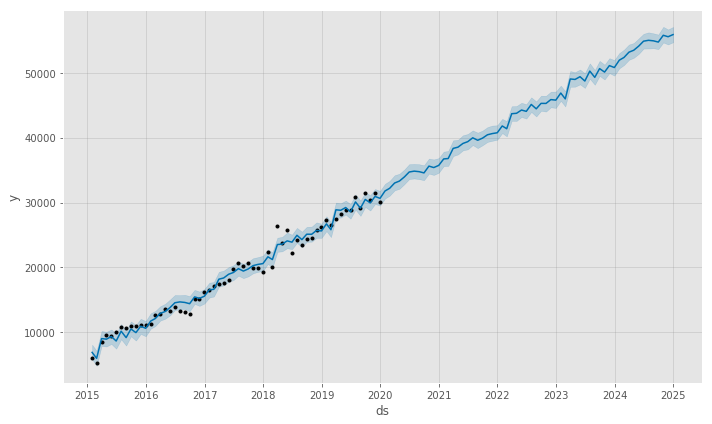

In [208]:
#Prévision du nombre de Points de charge à 5 ans
future = model.make_future_dataframe(periods=60, freq='M')
forecast = model.predict(future)
fig = model.plot(forecast)
fig.savefig('p8_img/forecast_prophet_pdc.png')

In [209]:
#Affichage des 5 derniers mois de prévision
forecast_pdc = model.predict(future)
forecast_pdc[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
115,2024-08-31,54920.637267,53778.863361,56125.404244
116,2024-09-30,54730.311782,53601.822213,55987.229471
117,2024-10-31,55776.641116,54581.108108,56964.972410
118,2024-11-30,55553.997146,54372.716977,56710.766427
119,2024-12-31,55884.566257,54636.470277,57032.394256


In [210]:
#Sauvegarde 
forecast_pdc.to_csv('p8_datatable/forecast_pdc.csv')

D'ici fin 2024 le maillage de Points de charge pourrait être étendu à environ 56 000 connecteurs, selon la prédiction de l'algorithme Prophet.

In [211]:
#Préparation des données (observations + prévisions) pour Test statistique
metric_forecast_pdc = forecast_pdc.set_index('ds')[['yhat']].join(pdc_forecast_prophet.set_index('ds').y).reset_index()
metric_forecast_pdc.dropna(inplace=True)
metric_forecast_pdc

,ds,yhat,y
0,2015-01-31,6908.603785,6061.0
1,2015-02-28,5990.765330,5235.0
2,2015-03-31,9037.424730,8478.0
3,2015-04-30,8945.294639,9574.0
4,2015-05-31,9347.373830,9383.0
5,2015-06-30,8660.342313,10086.0
6,2015-07-31,10172.638998,10801.0
7,2015-08-31,9184.781104,10731.0
8,2015-09-30,10512.912832,10928.0
9,2015-10-31,9955.565028,11007.0


In [212]:
#Mesures statistiques permettant d'évaluer le modèle
print("R2 = " + str(r2_score(metric_forecast_pdc['y'], metric_forecast_pdc['yhat'])))
print("MSE = " + str(mean_squared_error(metric_forecast_pdc['y'], metric_forecast_pdc['yhat'])))
print("RMSE = " + str(math.sqrt(mean_squared_error(metric_forecast_pdc['y'], metric_forecast_pdc['yhat']))))
print("MAE = " + str(mean_absolute_error(metric_forecast_pdc['y'], metric_forecast_pdc['yhat'])))

R2 = 0.9847791336028472
MSE = 797887.9309059462
RMSE = 893.245728176713
MAE = 740.1299762404773


Les coefficients statistiques sont plus optimistes que ceux des précédentes prévisions. Le coefficient de détermination reste proche de 1, seulement les autres métriques d'écart sont assez élevées. En d'autres termes la robustesse du modèle n'est pas très satisfaisante.

<u>A des fins de comparaison, la méthode de Holt-winters est également exploitée.</u>

In [213]:
#Préparation des données
irve_forecast_hw = irve_type_month.copy()
irve_forecast_hw['Time'] = pd.to_datetime(irve_forecast_hw['Time'])
irve_forecast_hw.set_index('Time', inplace=True)

In [214]:
#Méthode ExponentialSmoothing de statsmodels est utilisée pour la modélisation d'Holt-Winters.
from statsmodels.tsa.api import ExponentialSmoothing

y = np.array(irve_forecast_hw['Accessible au public'])
hw = ExponentialSmoothing(y, seasonal_periods=12, trend='add', seasonal='add').fit()
hw_pred = hw.forecast(60)

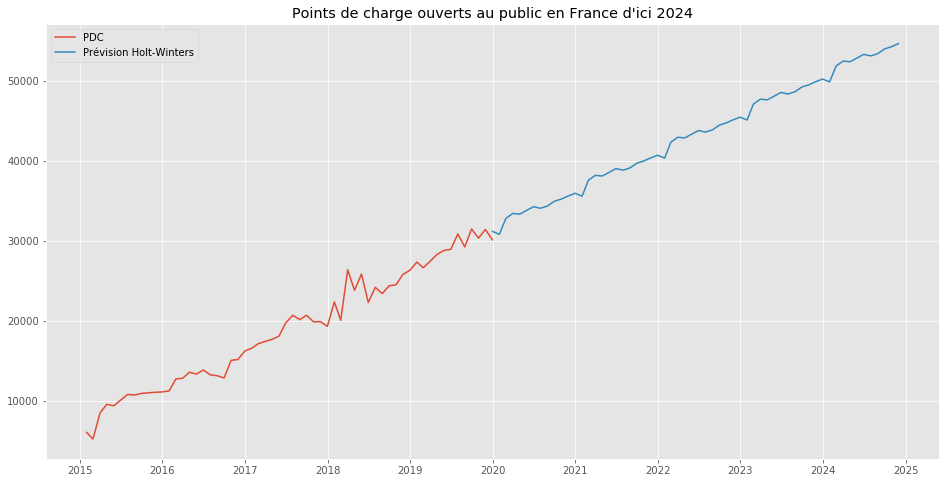

In [215]:
#Visualisation de la prévision à 5 ans par Holt-Winters
plt.figure(figsize(16, 8))
plt.plot(irve_forecast_hw['Accessible au public'], label='PDC')
plt.plot(pd.date_range(irve_forecast_hw.index[len(y)-1], periods=60, freq='M'), 
         hw_pred, label='Prévision Holt-Winters')

plt.title("Points de charge ouverts au public en France d'ici 2024")

fig.savefig('p8_img/holtwinters_pdc.png')
plt.legend()
plt.show()

In [216]:
#Affichage des valeurs prédites
hw_pred

array([31161.26005927, 30803.53802373, 32793.55176118, 33408.50019334,
       33315.93771195, 33785.16333284, 34244.88692261, 34051.84976341,
       34330.08534033, 34916.06745115, 35196.69274119, 35576.95640223,
       35916.20103838, 35558.47900284, 37548.49274029, 38163.44117245,
       38070.87869106, 38540.10431195, 38999.82790172, 38806.79074252,
       39085.02631944, 39671.00843026, 39951.6337203 , 40331.89738134,
       40671.14201749, 40313.41998195, 42303.4337194 , 42918.38215156,
       42825.81967017, 43295.04529107, 43754.76888083, 43561.73172163,
       43839.96729855, 44425.94940937, 44706.57469941, 45086.83836045,
       45426.0829966 , 45068.36096106, 47058.37469851, 47673.32313067,
       47580.76064928, 48049.98627018, 48509.70985994, 48316.67270074,
       48594.90827766, 49180.89038848, 49461.51567853, 49841.77933956,
       50181.02397571, 49823.30194017, 51813.31567762, 52428.26410978,
       52335.7016284 , 52804.92724929, 53264.65083905, 53071.61367985,
      

**Après ces deux modélisations, on peut conclure à un développement du réseau des points de charge (PDC ou Charging Point) entre 55 000  et 60 000 connecteurs d'ici fin 2024.** 

[Retour vers la page notebook précédente (Positionnement de la voiture électrique de 2010 à 2019 et prévision à 2 ans)](https://github.com/nalron/project_electric_cars_france2040/blob/french_version/p8_notebook01.ipynb)

[Voir la suite du projet : Appel de charge au réseau électrique (Profilage d'un pic de consommation en 2040, etc…)](https://github.com/nalron/project_electric_cars_france2040/blob/french_version/p8_notebook03.ipynb)